# **Project Code**

---

## Install Required Packages

We need to install the following Python packages to run the code in this notebook:

- `plotnine`: This package is used for creating visualizations in Python, inspired by ggplot2.
- `pandas` (imported as `pd`): Pandas is a powerful library for data manipulation and analysis in Python.
- `numpy` (imported as `np`): NumPy is a fundamental package for scientific computing with Python. 
- `seaborn` (imported as `sns`):: This package is used for creating advanced visualizations in Python.

In [43]:
!pip install plotnine
!pip install pandas
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Required Libraries

In this section, we import the necessary Python libraries for data manipulation and visualization:

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns


## Load and Explore the Dataset

In this section, we load the **non forest tree cover dataset** from a CSV file ,perform initial exploration and pre-processing

In [3]:
df_tree_cover = pd.read_csv('State_treecover.csv')

df_tree_cover = df_tree_cover.drop(df_tree_cover.columns[0], axis=1)
df_tree_cover = df_tree_cover.sort_values(by='State/UT')
df_tree_cover.loc[41] = df_tree_cover.loc[35]

index_to_drop = [35]  
df_tree_cover = df_tree_cover.drop(index_to_drop)
df_tree_cover = df_tree_cover.reset_index()

df_tree_cover = df_tree_cover.drop(df_tree_cover.columns[0], axis=1)

df_tree_cover_1 = df_tree_cover[df_tree_cover.columns[[0,2]]]
df_tree_cover_1['State/UT'][0] = 'A&N Islands'
df_tree_cover_1['State/UT'][7] = 'DNHDD'
df_tree_cover_1['State/UT'][13] = 'J&K (+Ladakh)'
df_tree_cover_1.head(2)

,State/UT,Tree Cover - 2021
0,A&N Islands,23.0
1,Andhra Pradesh,4679.0


In this section, we load the **forest cover dataset** from a CSV file ,perform initial exploration and pre-processing:

In [4]:
df_forest_cover = pd.read_csv('state_Forest_Cover.csv')
df_forest_cover_1 = df_forest_cover[df_forest_cover.columns[[0,1,5]]]
combined = df_forest_cover_1.iloc[33]['ISFR 2021 - Total Forest Cover'] + df_forest_cover_1.iloc[34]['ISFR 2021 - Total Forest Cover']
new_row_data = {'State/UTs': 'J&K (+ Ladakh)', 'Geographical Area': 222236,'ISFR 2021 - Total Forest Cover': combined}
df_forest_cover_1.loc[len(df_forest_cover_1)] = new_row_data


combined = df_forest_cover_1.iloc[31]['ISFR 2021 - Total Forest Cover'] + df_forest_cover_1.iloc[32]['ISFR 2021 - Total Forest Cover']
new_row_data = {'State/UTs': 'DNHDD', 'Geographical Area': 602,'ISFR 2021 - Total Forest Cover': combined}
df_forest_cover_1.loc[len(df_forest_cover_1)] = new_row_data


index_to_drop = [31,32,33,34]  
df_forest_cover_1 = df_forest_cover_1.drop(index_to_drop)
df_forest_cover_1 = df_forest_cover_1.sort_values(by='State/UTs')
df_forest_cover_1.loc[41] = df_forest_cover_1.loc[37]

index_to_drop = [37]  
df_forest_cover_1 = df_forest_cover_1.drop(index_to_drop)
df_forest_cover_1 = df_forest_cover_1.reset_index()

df_forest_cover_1 = df_forest_cover_1.drop(df_forest_cover_1.columns[0], axis=1)

df_forest_cover_1['State/UTs'][0] = 'A&N Islands'
df_forest_cover_1.head(2)

,State/UTs,Geographical Area,ISFR 2021 - Total Forest Cover
0,A&N Islands,8249,6744.0
1,Andhra Pradesh,162968,29784.0


In [5]:
union_territories = ['A&N Islands', 'Chandigarh', 'DNHDD', 'Delhi', 'Lakshadweep', 'Puducherry','J&K (+ Ladakh)']
def categorical_value(row):
    if row == 'Grand Total':
        return None  
    elif row in union_territories:
        return 0
    else:
        return 1
df_forest_cover_1['categorical'] = df_forest_cover_1['State/UTs'].apply(categorical_value)


## **Visualization 1** : Total Tree Cover ISFR - 2021
The bar plot illustrates the distribution of forest cover (in square kilometres) across various states and union territories in India, as reported in the Indian State of Forest Report (ISFR) for the year 2021. Notably, Madhya Pradesh emerges as the state with the highest forest cover.

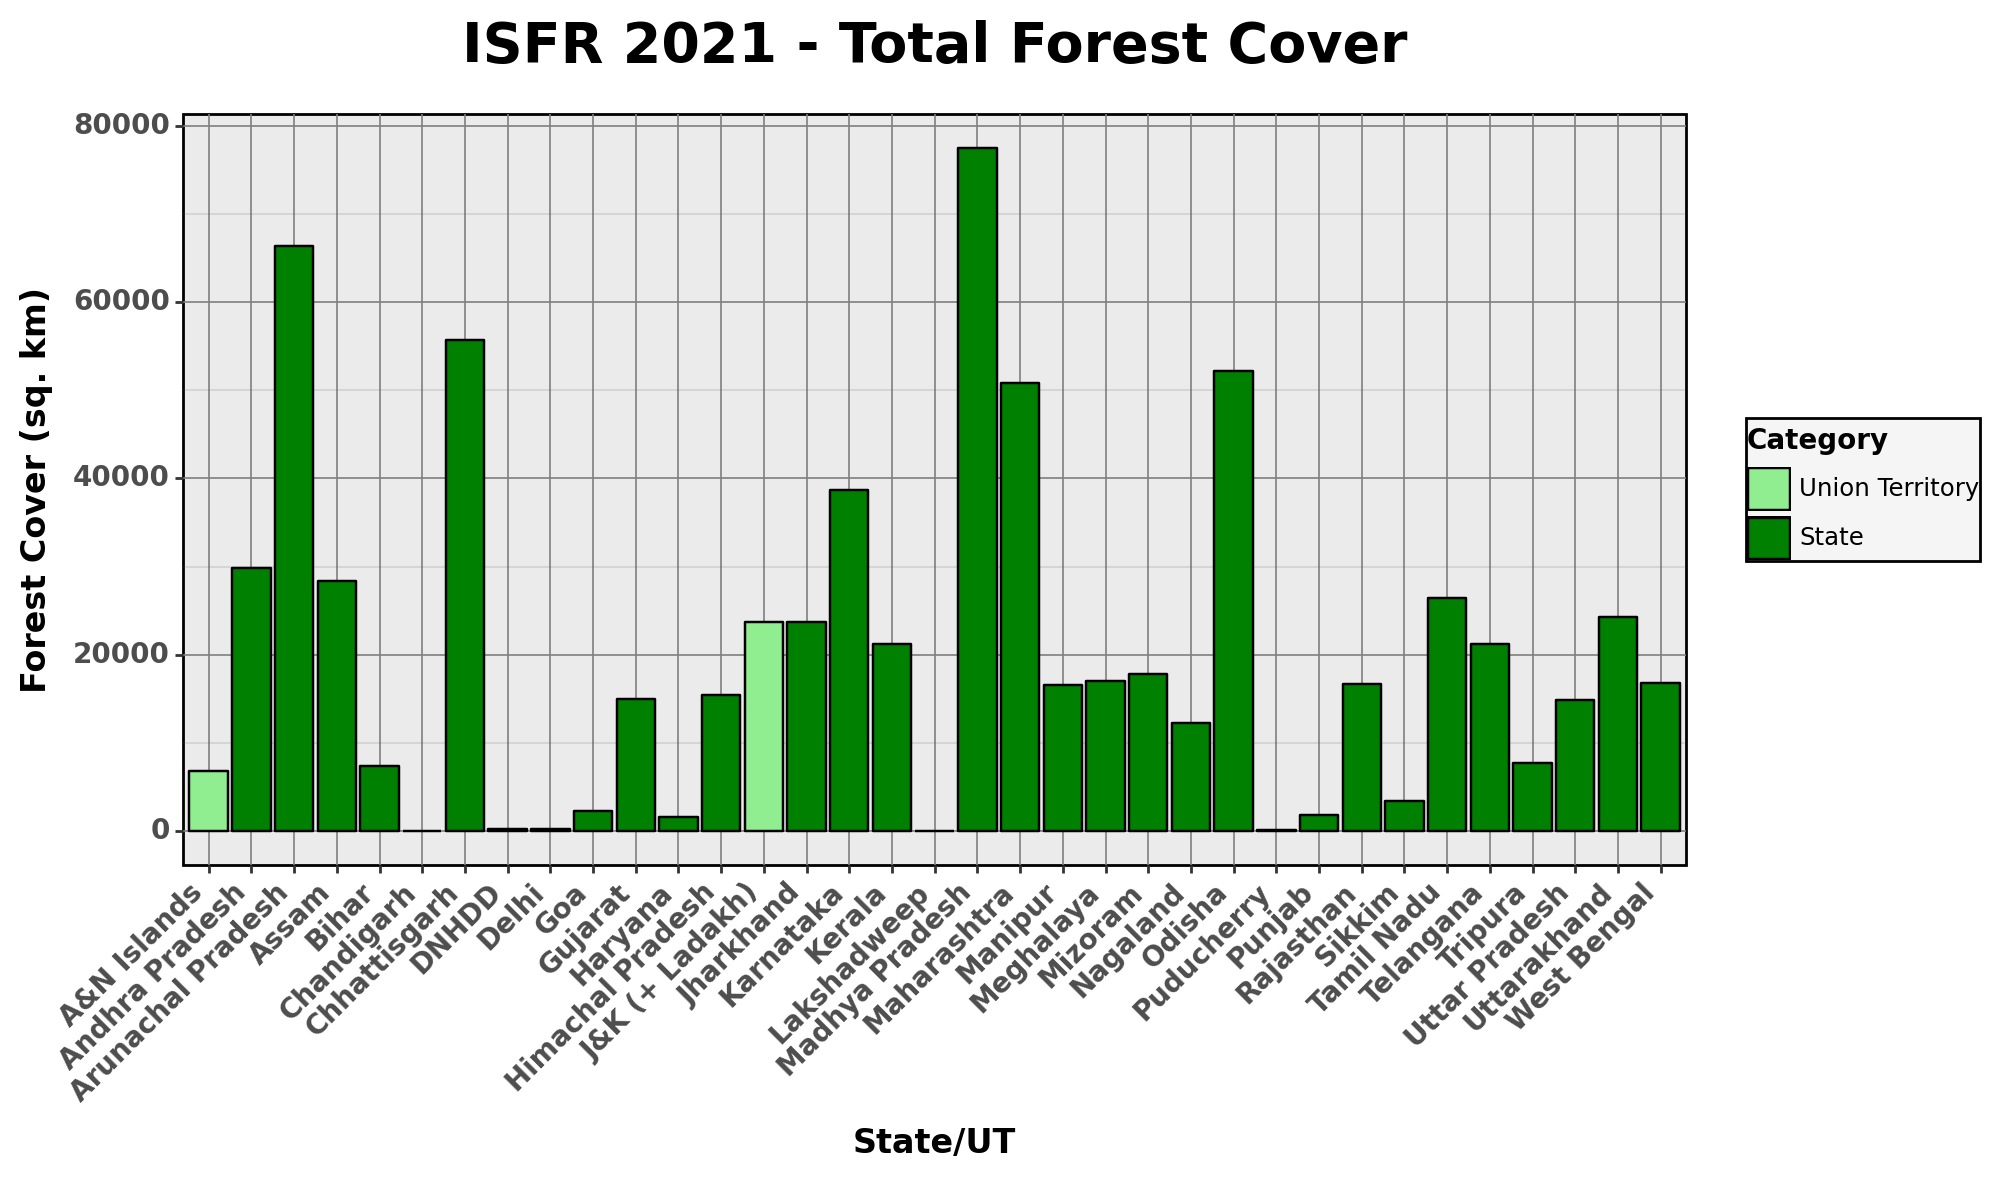

In [6]:
plot = (
    ggplot(df_forest_cover_1[:-1], aes(x='State/UTs', y='ISFR 2021 - Total Forest Cover', fill='categorical')) +
    labs(title='ISFR 2021 - Total Forest Cover',
         x='State/UT',
         y='Forest Cover (sq. km)') +
    theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black'),
          legend_spacing=20) +
    geom_bar(stat='identity', position='stack', color='black') +
    scale_fill_gradient(high="green", low="#90EE90", limits=[0, 1], breaks=[0, 1], labels=["Union Territory", "State"], guide='legend') +
    guides(fill=guide_legend(title="Category"))  # Add legend
)

print(plot)



### Primary Observations:
- Madhya Pradesh emerges as the state with the highest forest cover.
- J&K (+Ladakh) is the union territory with highest forest cover.

In [7]:
df_green = df_forest_cover_1[df_forest_cover_1.columns[:-1]].copy()
df_green['Non_Forest_Tree_Cover'] = df_tree_cover_1['Tree Cover - 2021']
df_green.rename(columns={'ISFR 2021 - Total Forest Cover': 'Forest Cover'}, inplace=True)

df_green.head(2) 

,State/UTs,Geographical Area,Forest Cover,Non_Forest_Tree_Cover
0,A&N Islands,8249,6744.0,23.0
1,Andhra Pradesh,162968,29784.0,4679.0


In [8]:
df_melted = df_green[:-1].melt(id_vars='State/UTs', var_name='Variable', value_name='Value')
df_melted['Variable'] = pd.Categorical(df_melted['Variable'], categories=['Geographical Area', 'Forest Cover', 'Non_Forest_Tree_Cover'], ordered=True)

## **Visualization 2**: Total Geographical Area, Forest Area and non-Forest Tree cover

This bar plot presents a comparative analysis of three key metrics – total geographical area, total forest cover, and non-forest tree cover – for each state and union territory in India.

For each state and union territory, the bar plot displays three bars representing:
1. Total geographical area (Mud Brown)
2. Total forest cover (Dark Green)
3. Non-forest tree cover (Lemon Yellow)

The height of each bar corresponds to the magnitude of the respective metric, allowing for a visual comparison of the geographical distribution of forest and non-forest tree cover relative to the total land area in each region.


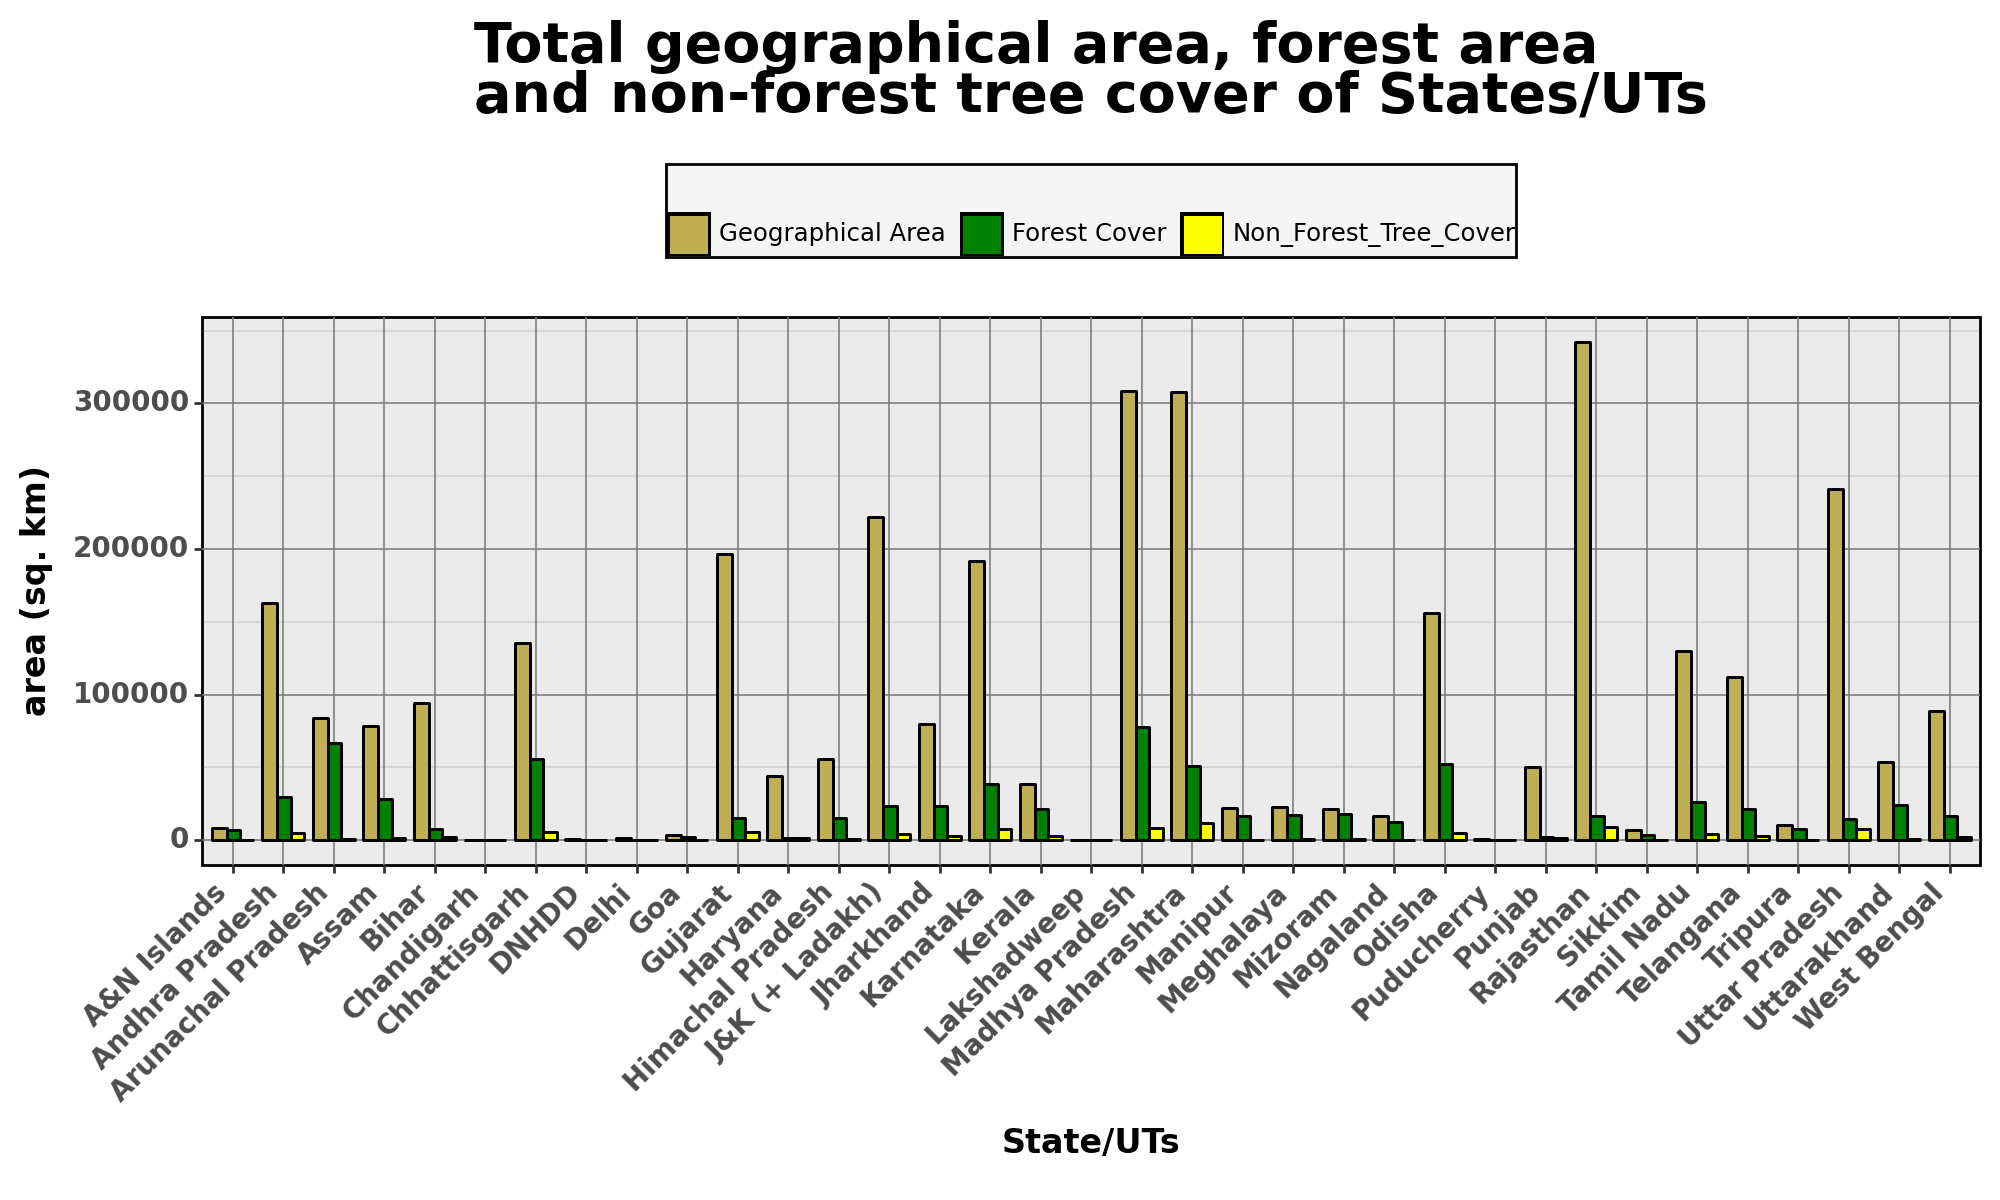

In [9]:

plot = (
    ggplot(df_melted, aes(x='State/UTs', y='Value', fill='Variable')) +
    geom_bar(stat='identity', position=position_dodge(width=0.8), color='black', size=0.6) +  
    labs(title='Total geographical area, forest area\nand non-forest tree cover of States/UTs',
         x='State/UTs',
         y='area (sq. km)') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') +
    scale_fill_manual(values=['#BFAE54','green', 'yellow'])  + 
    guides(fill=guide_legend(title='')) 
)

print(plot)


### Primary Observations:
- Rajasthan is the biggest state in terms of Area . 
- Madhya Pradesh is the state with the highest forest cover.
- J&K (+Ladakh) is the biggest union territory and also has the highest forest cover area . 
- Maharashtra has the highest non forest tree cover.

In [11]:
df_green['Forest_Cover_Ratio'] = df_green['Forest Cover'] / df_green['Geographical Area']
df_green['Non_Forest_Tree_Cover_Ratio'] = df_green['Non_Forest_Tree_Cover'] / df_green['Geographical Area']

df_melted = df_green[:-1].melt(id_vars='State/UTs', value_vars=['Forest_Cover_Ratio', 'Non_Forest_Tree_Cover_Ratio'], 
                    var_name='Variable', value_name='Ratio')
mean_values = df_melted.groupby('Variable')['Ratio'].mean().reset_index()


## **Visualization 3**: Ratio of Forest and Non-Forest Tree Cover to Geographical Area for States/UTs

While the previous bar plot provided a comparative analysis of forest cover, non-forest tree cover, and geographical area for each state and union territory, the absolute values of forest and non-forest tree cover were often small relative to the total geographical area. Therefore, the inclusion of this additional plot, depicting the ratios of forest cover and non-forest tree cover to geographical area, offers a more nuanced perspective by normalizing the data to account for variations in geographical size.

For each state and union territory, the plot consists of two bars representing:
1. Ratio of forest cover to total geographical area (Dark Green)
2. Ratio of non-forest tree cover to total geographical area (Lemon Yellow)

The height of each bar indicates the proportion of forest cover or non-forest tree cover relative to the total geographical area for the respective region.


: Ratio of Forest and Non-Forest Tree Cover to Geographical Area for States/UTs

While the previous bar plot provided a comparative analysis of forest cover, non-forest tree cover, and geographical area for each state and union territory, the absolute values of forest and non-forest tree cover were often small relative to the total geographical area. Therefore, the inclusion of this additional plot, depicting the ratios of forest cover and non-forest tree cover to geographical area, offers a more nuanced perspective by normalizing the data to account for variations in geographical size.

For each state and union territory, the plot consists of two bars representing:
1. Ratio of forest cover to total geographical area (Dark Green)
2. Ratio of non-forest tree cover to total geographical area (Lemon Yellow)

The height of each bar indicates the proportion of forest cover or non-forest tree cover relative to the total geographical area for the respective region.


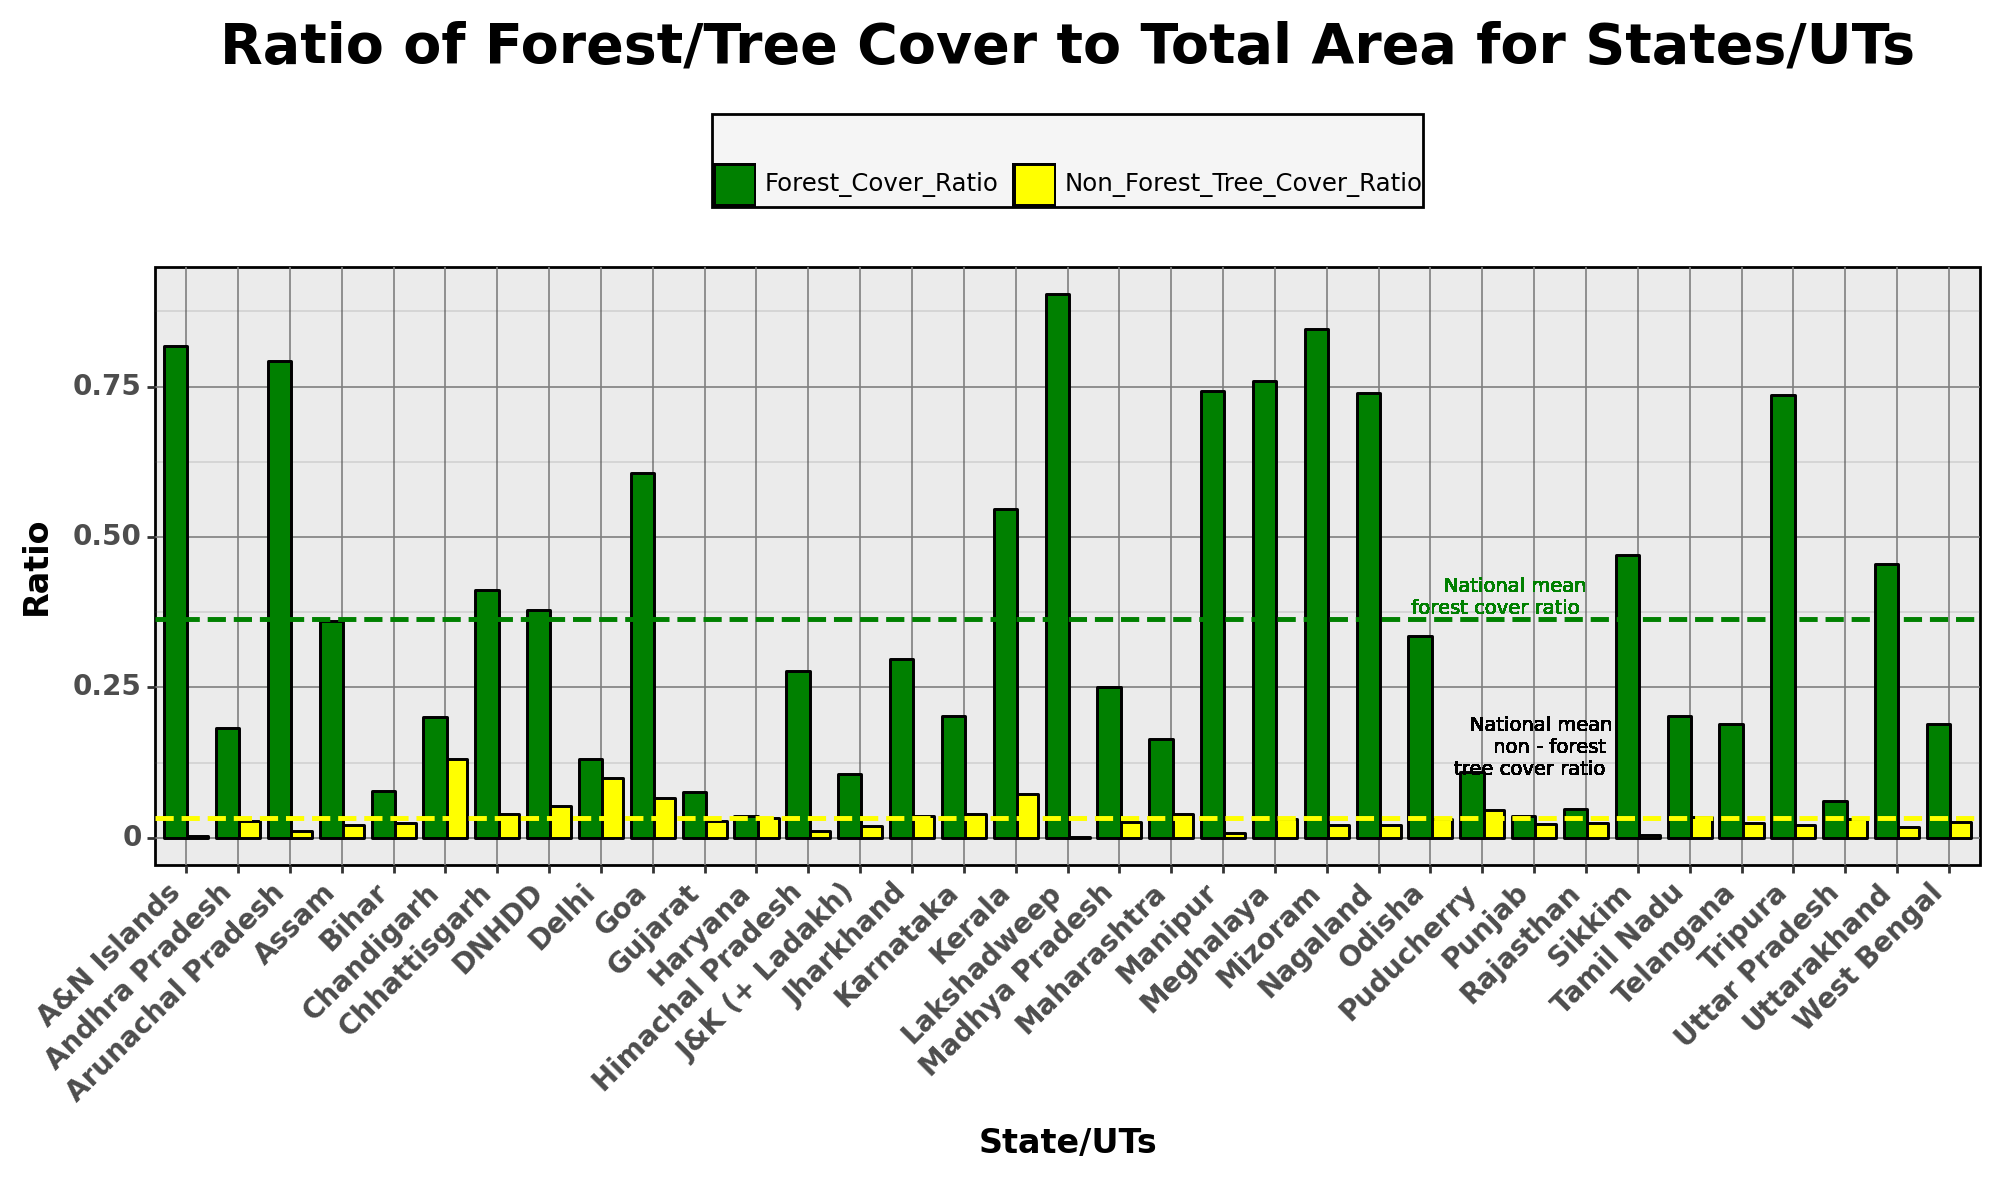

In [33]:
plot = (
    ggplot(df_melted, aes(x='State/UTs', y='Ratio', fill='Variable')) +
    geom_bar(stat='identity', position=position_dodge(width=0.8), color='black', size=0.6) +
    geom_hline(aes(yintercept='Ratio'), data=mean_values, linetype='dashed', color=['green','yellow'], size=1) +
    geom_text(x=28, y=0.4, label='National mean\n forest cover ratio ', color='green', size=7, angle=0, ha='right', va='center') + 
    geom_text(x=28.5, y=0.15, label='National mean\n non - forest \ntree cover ratio ', color='black', size=7, angle=0, ha='right', va='center') + 
    
    labs(title='Ratio of Forest/Tree Cover to Total Area for States/UTs',
         x='State/UTs',
         y='Ratio') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') +
    scale_fill_manual(values=['green', 'yellow']) +
    guides(fill=guide_legend(title='')) 
)

print(plot)


### Primary Observations:
The absolute numbers could be misleading so we are analysing the ratios
- Lakshadweep emerges as the with the highest forest cover ratio amongst all states/UTs.
- Madhya Pradesh the state with highest forest cover stands at just 0.25.
- Chandigarh turns out to have the highest non-forest tree cover ratio.
- Mean forest cover ratio is only 0.36 (this is not a weighted mean else it would go even lower).
- Mean non -forest tree cover ration 0.03.


In [34]:
mean_values

,Variable,Ratio
0,Forest_Cover_Ratio,0.364178
1,Non_Forest_Tree_Cover_Ratio,0.033065


# **Hypothesis 1**
---
States with larger geographical areas tend to have a lower percentage of their total area covered by forest, suggesting an inverse relationship between geographical area and forest coverage percentage.

In [36]:
def min_max_scale(data):
    min_val = np.nanmin(data)
    if np.isnan(min_val):
        min_val = np.nanmin(data[np.isfinite(data)])
        
    max_val = np.nanmax(data)
    
    if np.isnan(min_val) or np.isnan(max_val) or min_val == max_val:
        return np.full_like(data, np.nan)
    
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

df_green['scaled_geographical_area'] = min_max_scale(df_green['Geographical Area'])*10
df_green['Total_Tree_cover_ratio'] = df_green['Forest_Cover_Ratio'] + df_green['Non_Forest_Tree_Cover_Ratio']

## **Visualization 4** : Scatter Plot of Scaled Geographical Area vs. Total Tree Cover Ratio

The scatter plot showcases each state and union territory as a data point, with the x-axis representing the min-max scaled geographical area and the y-axis indicating the total tree cover ratio. The total tree cover ratio is calculated as the combined percentage of forest cover and non-forest tree cover relative to the total geographical area for each region. Additionally, a smoothing line with the loess method is overlaid on the scatter plot to visualize the general trend of the relationship between geographical area and total tree cover ratio.


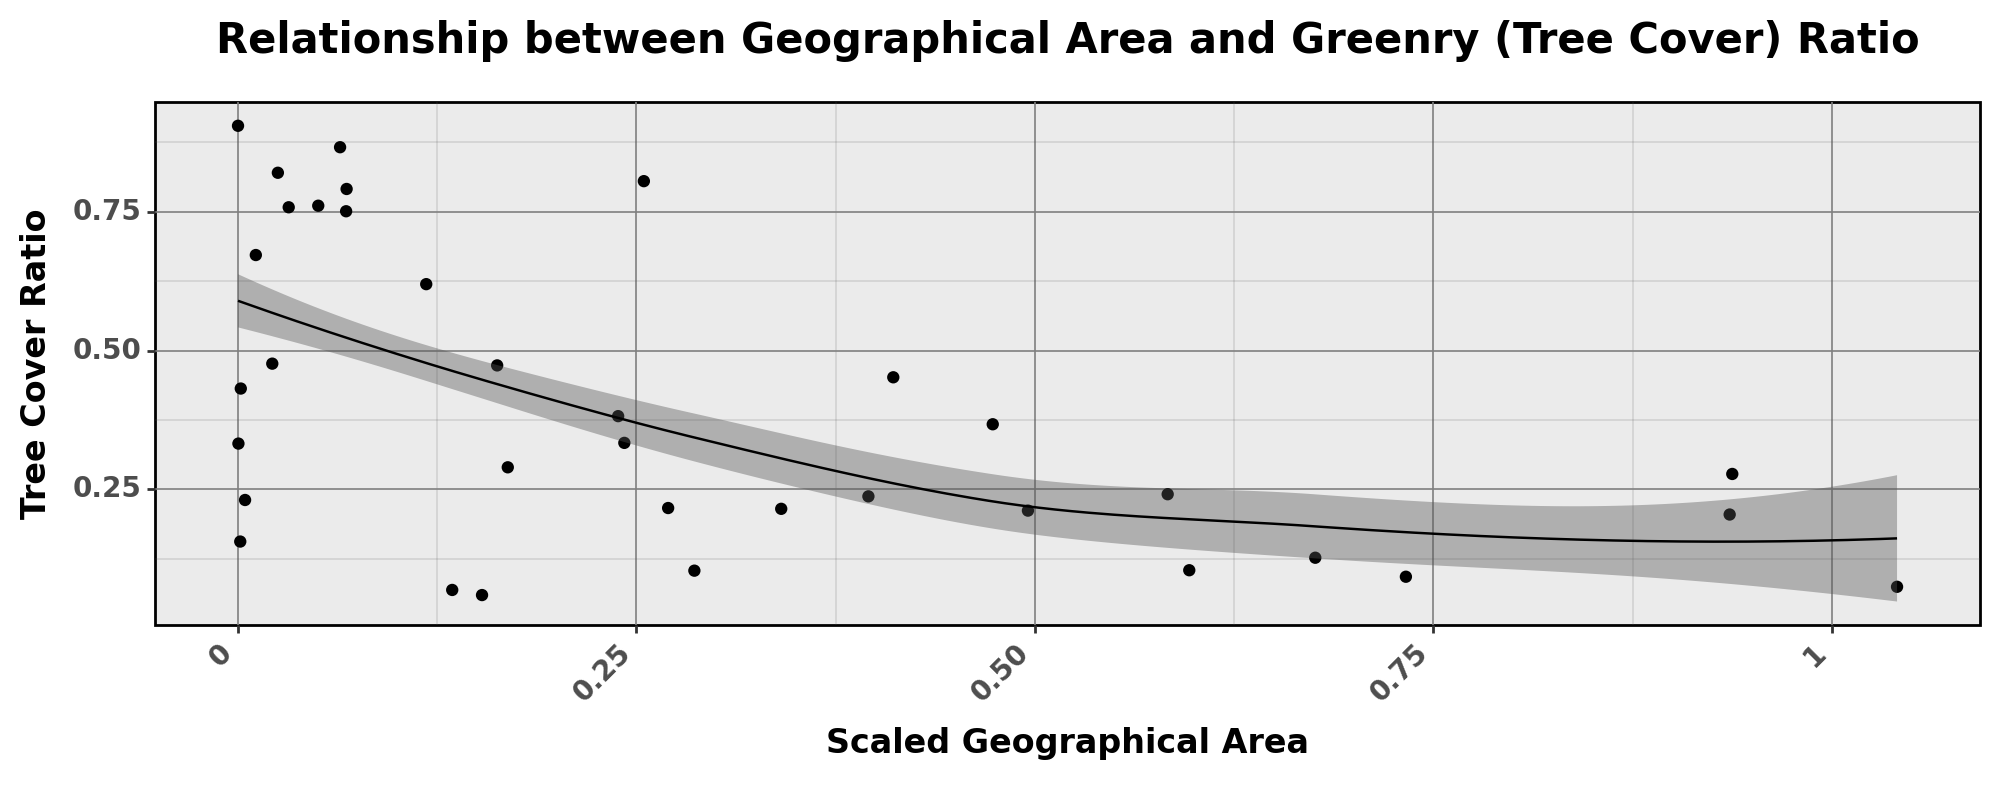

In [37]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='scaled_geographical_area', y='Total_Tree_cover_ratio')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=200, span=1, se=True, linetype="solid", size=0.5, level=0.5, fill='#555555') +
     
    labs(title='Relationship between Geographical Area and Greenry (Tree Cover) Ratio',
         x='Scaled Geographical Area',
         y='Tree Cover Ratio') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)


### Observation & Support for Hypothesis 1:
The scatter plot provides empirical evidence supporting Hypothesis 1, which posits that states with 
larger geographical areas tend to have a lower percentage of their total area covered by forest. The 
observed trend of the smoothing line decreasing with increasing geographical area suggests an 
inverse relationship between geographical area and forest coverage percentage. This finding 
underscores the importance of considering geographical size when assessing forest cover and 
highlights potential implications for environmental conservation and management strategies.

---

In this section, we load the **rainfall dataset** containing from a CSV file ,perform initial exploration and pre-processing:

In [38]:
df_rainfall = pd.read_csv('State_rainfall.csv')
df_rainfall_1 = df_rainfall[df_rainfall.columns[[0, 4, 5]]]
df_rainfall_1.loc[6, 'State'] = 'DNGDD'
df_rainfall_1.loc[12, 'State'] = 'J&K (+ Ladakh)'
df_rainfall_1.loc[12, df_rainfall_1.columns[1:]] += df_rainfall_1.loc[16, df_rainfall_1.columns[1:]]
df_rainfall_1.loc[16] = ['A&N Islands', None, None]  
df_rainfall_1 = df_rainfall_1.sort_values(by='State')
df_rainfall_1 = df_rainfall_1.reset_index()
df_rainfall_1 = df_rainfall_1.drop(df_rainfall_1.columns[0],axis=1)
df_rainfall_1.loc[35] = ['Tosal',sum(df_rainfall_1[df_rainfall_1.columns[1]]),sum(df_rainfall_1[df_rainfall_1.columns[2]])]
df_rainfall_1.head(4)


,State,2021 - Actual,2021 - Normal
0,A&N Islands,NaN,NaN
1,Andhra Pradesh,613.5,514.4
2,Arunachal Pradesh,1294.0,1726.6
3,Assam,1150.0,1486.2


##	**Visualization 5**: Double Bar Plot of Total and Average Rainfall

This double bar plot illustrates both the total and average rainfall for each state and union territory in India.
For each state and union territory, the plot displays two sets of bars:
1. Total rainfall: Represents the total amount of rainfall received by each region over a specific period. (Sky Blue)
2. Average rainfall: Indicates the average rainfall amount calculated over a defined time frame.
(Navy Blue)

The height of each bar corresponds to the magnitude of rainfall, providing a visual comparison of total and average rainfall across different regions.


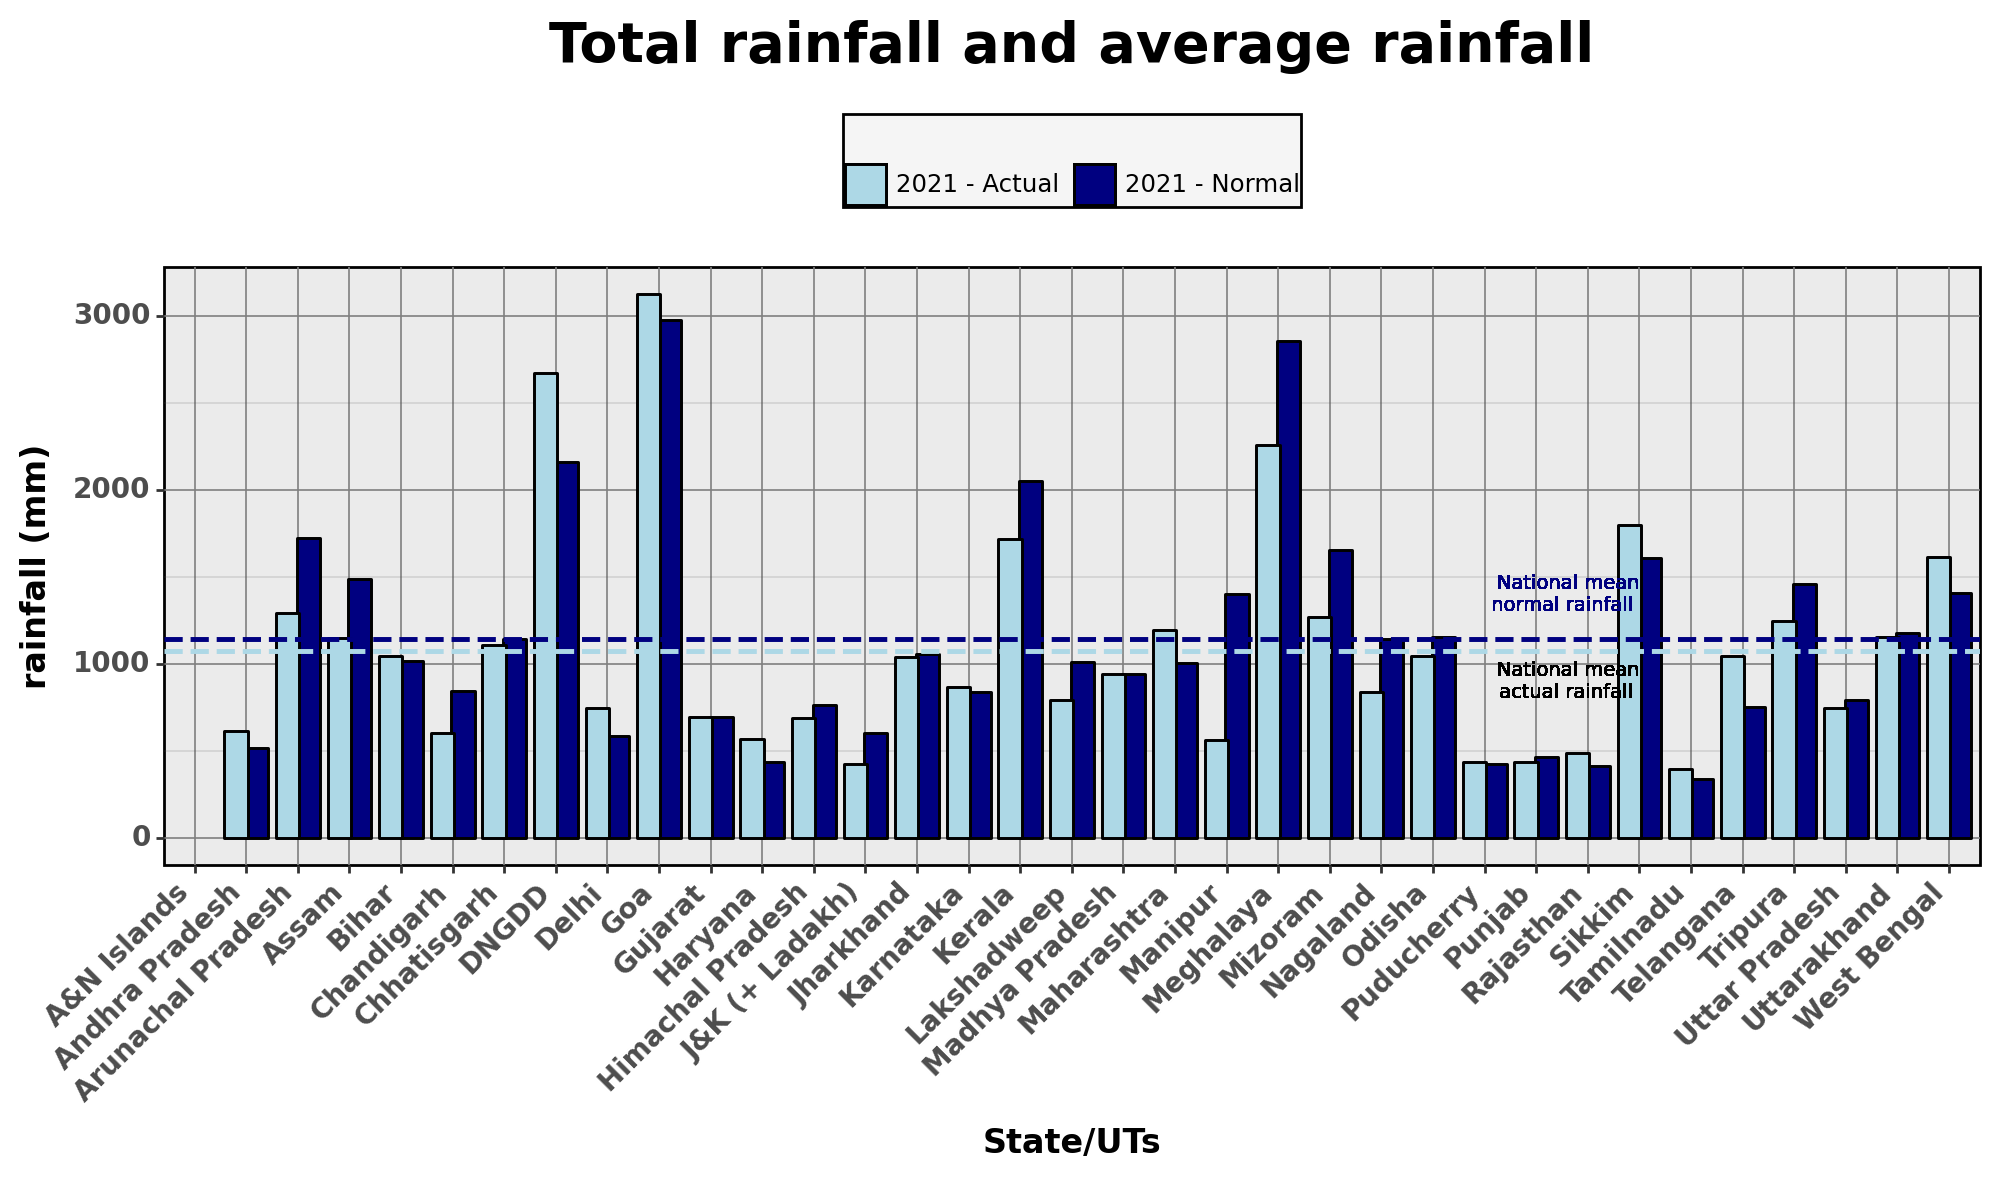

In [52]:
df_melted = df_rainfall_1[:-1].melt(id_vars='State', var_name='Variable', value_name='Value')

mean_values = df_melted.groupby('Variable')['Value'].mean().reset_index()

# Plot
plot = (
    ggplot(df_melted, aes(x='State', y='Value', fill='Variable')) +
    geom_bar(stat='identity', position=position_dodge(width=0.8), color='black', size=0.6) +
    geom_hline(aes(yintercept='Value'), data=mean_values, linetype='dashed', color=['#ADD8E6','#000080'], size=1) +
    geom_text(x=29, y=900, label='National mean\n actual rainfall ', color='black', size=7, angle=0, ha='right', va='center') + 
    geom_text(x=29, y=1400, label='National mean\n normal rainfall ', color='#000080', size=7, angle=0, ha='right', va='center') + 

    labs(title='Total rainfall and average rainfall',
         x='State/UTs',
         y='rainfall (mm)') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2), 
          legend_spacing=20,
          legend_position='top') +
    scale_fill_manual(values=['#ADD8E6','#000080'])  + 
    guides(fill=guide_legend(title='')) 
)

print(plot)


### Primary Observations:
- Goa emerges as the state to receive highest rainfall.
- Mean actual rainfall 1077.
- Mean normal rainfall 1144.
- The rainfall in 2021 was less than the average rainfall received.


In [54]:
mean_values

,Variable,Value
0,2021 - Actual,1077.123529
1,2021 - Normal,1144.235294


In [55]:
df_green['rainfall'] = df_rainfall_1['2021 - Normal']
df_green['scaled_rainfall'] = min_max_scale(df_green['rainfall'])

# **Hypothesis 2**
---
States experiencing higher rainfall tend to exhibit a corresponding increase in the percentage of forest coverage across their total area, indicating a direct positive correlation between rainfall and forest coverage percentage.

## **Visualization 6**: Scatter Plot of Min-Max Scaled Rainfall vs. Total Green Area Ratio

This scatter plot investigates the relationship between the min-max scaled rainfall and the total green area ratio (combining forest cover and non-forest tree cover) for each state and union territory in India.

Each state and union territory is represented as a data point on the scatter plot. The x-axis depicts the min-max scaled rainfall, representing the variation in rainfall levels across regions, while the y-axis indicates the total green area ratio, representing the combined percentage of forest cover and non-forest tree cover relative to the total geographical area for each region. Additionally, a smoothing line with the loess method is included to visualize the overall trend in the relationship between rainfall and total green area ratio.


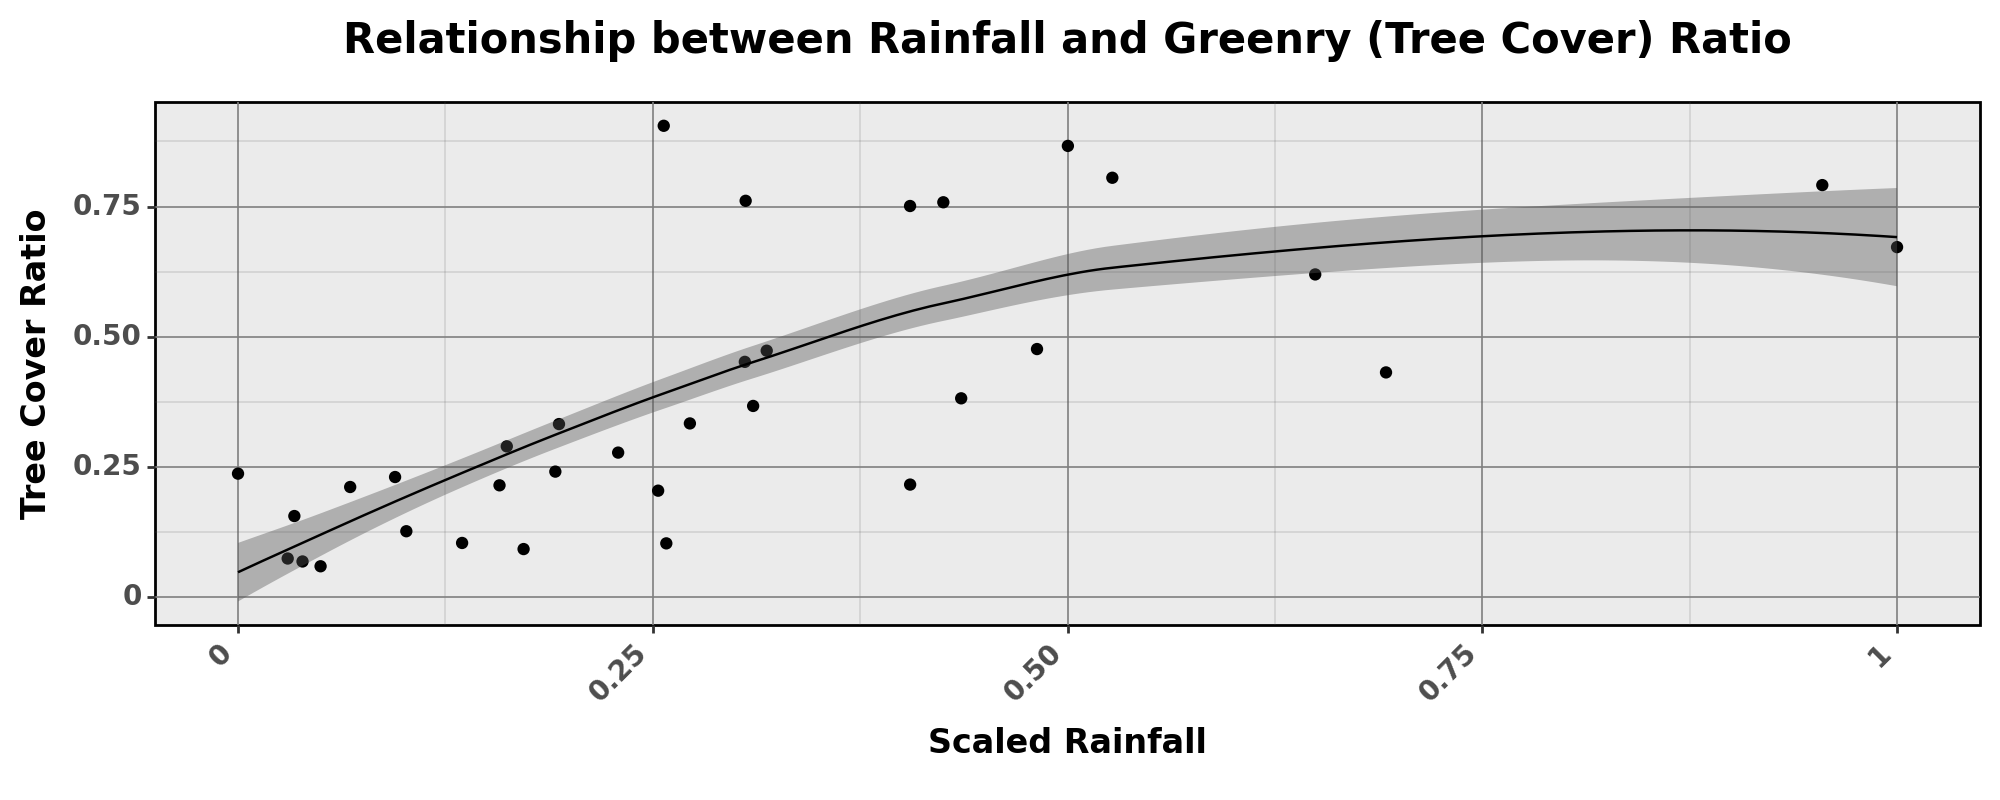

In [56]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='scaled_rainfall', y='Total_Tree_cover_ratio')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=200, span=1, se=True, linetype="solid", size=0.5, level=0.5, fill='#555555') +
     
    labs(title='Relationship between Rainfall and Greenry (Tree Cover) Ratio',
         x='Scaled Rainfall',
         y='Tree Cover Ratio') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)


### Observations & Support for Hypothesis 2:
The scatter plot provides empirical evidence supporting Hypothesis 2, which suggests a positive 
correlation between rainfall and forest coverage percentage. The observed trend of the smoothing 
line increasing with min-max scaled rainfall implies a direct relationship between rainfall levels and 
the percentage of green area coverage, indicating that states experiencing higher rainfall tend to 
exhibit a corresponding increase in the proportion of forest and non-forest tree cover across their 
total area and vice versa.

---

In this section, we load the **Air pollution dataset** from a CSV file ,perform initial exploration and pre-processing:

In [57]:
df_AP = pd.read_csv('State_AIR_pollution.csv', encoding='latin1')
df_AP_1 = df_AP[df_AP.columns[[1,2,3]]]
df_AP_1['State/UT'] = df_AP_1['State/UT'].replace({'Dadara and Nagar Haveli and Daman and Diu': 'DNHDD'})
df_AP_1['State/UT'] = df_AP_1['State/UT'].replace({'Jammu and Kashmir': 'J&K (+ Ladakh)'})
df_AP_1.loc[len(df_AP_1)] = ['A&N Islands', '',16.6]
df_AP_1.loc[len(df_AP_1)] = ['Lakshadweep', '',20]  
df_AP_1 = df_AP_1.sort_values(by='State/UT')
df_AP_1 = df_AP_1.reset_index()
df_AP_1.rename(columns={'Annual Average Concentration of PM10 (µg/m3) - National Standard (Annual Average): 60 µg/m3': 'PM10 Concentration'}, inplace=True)

df_AP_1 = df_AP_1.drop(df_AP_1.columns[[0]],axis=1)
df_AP_1.head(2)

,State/UT,City / Town,PM10 Concentration
0,A&N Islands,,16.6
1,Andhra Pradesh,Amaravati,55.0


In [58]:
National_Standard_Annual_Average_PM10_ug_m3 =  60 
df_AP_1['log_scaled_PM10 Concentration'] = np.log(df_AP_1['PM10 Concentration'])
median_PM10 = df_AP_1.groupby('State/UT')['log_scaled_PM10 Concentration'].median().reset_index()
median_PM10.rename(columns={'log_scaled_PM10 Concentration': 'Median_PM10'}, inplace=True)
df_AP_1 = pd.merge(df_AP_1, median_PM10, on='State/UT')
df_AP_1['Difference'] = np.log(60) - df_AP_1['Median_PM10']

## **Visualization 7** : Box Plot of PM10 Concentration Across States/UTs

This box plot illustrates the distribution of PM10 concentration levels across different states in India. The data is grouped by states/UTs, with each box representing the range of PM10 concentrations observed within a specific region. 

- Box Plot: Each box in the plot represents the interquartile range (IQR) of PM10 concentrations within a state, with the median value depicted as a horizontal line within the box. The whiskers extend to the minimum and maximum observed concentrations, excluding outliers.
- National Standard Line: A dashed line is included to represent the national standard for PM10 concentration. This standard serves as a reference point for assessing the air quality levels across different states.
- Color Gradient: The color gradient within each box is determined by the deviation of the state's median PM10 concentration from the national average. Shades of red indicate concentrations higher than the standard, shades of green indicate concentrations lower than the standard, and white indicates concentrations within the standard range.


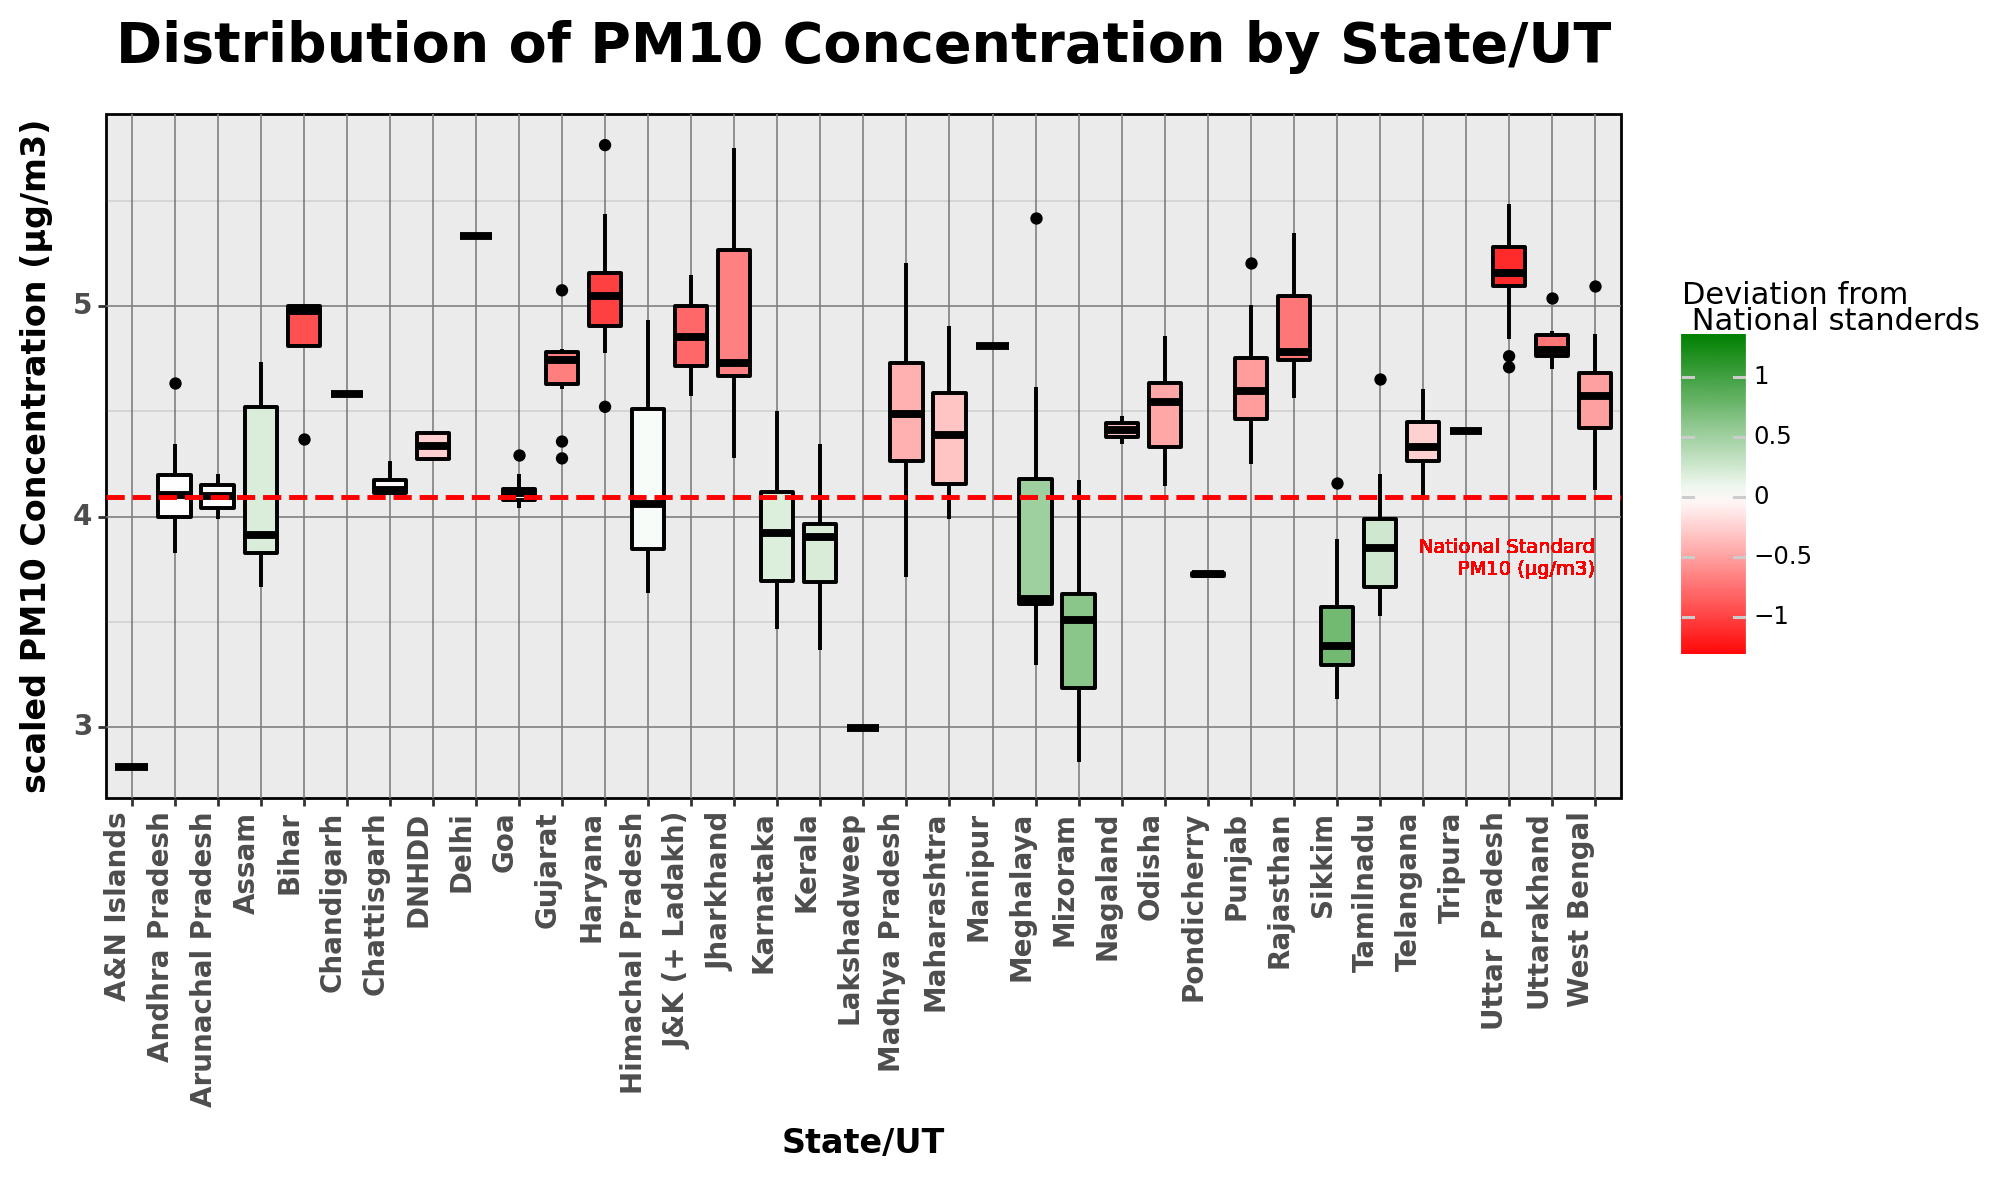

In [59]:

box_plot = (
    ggplot(df_AP_1, aes(x='State/UT', y='log_scaled_PM10 Concentration', fill='Difference')) +
    geom_boxplot(linetype='-', size=0.8, color="black", outlier_color="black", outlier_shape="o") +
    geom_hline(yintercept=np.log(60), linetype='dashed', color='red', size=1) +  
    geom_text(x=35, y=3.8, label='National Standard\nPM10 (µg/m3)', color='red', size=7, angle=0, ha='right', va='center') + 
    labs(title='Distribution of PM10 Concentration by State/UT',
         x='State/UT',
         y='scaled PM10 Concentration (µg/m3)') +
    scale_fill_gradient2(name='Deviation from \n National standerds', low="red", mid="white", high="green", midpoint=0, na_value='gray') + 
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_border=element_rect(color="black", fill="transparent", size=1)) + 
    theme(axis_text_x=element_text(angle=90, hjust=1))  
)

print(box_plot)


### Primary Observations:
- A&I Islands emerges to have the lowest PM10 concentrations (as of median).
- Delhi emerges to have the highest PM10 concentrations (due to median).
- However, the most polluted place (in terms of PM10 concentrations) exists in Haryana . 
- National Standard for Annual PM10 concentrations is 60.

In [60]:
df_green['Air_pollution'] = median_PM10['Median_PM10']

# **Hypothesis 3**
High forest coverage in states correlates with lower PM10 concentrations, suggesting an inverse relationship between green area percentage and air pollution levels.

## **Visualization 8**: Scatter Plot of PM10 Concentration vs. Greenery Ratio

This scatter plot examines the relationship between PM10 concentration (a measure of air pollution) and the greenery ratio (percentage of green area, including forest cover and non-forest tree cover) across different states in India.

Each state is represented as a data point on the scatter plot, with PM10 concentration depicted on the x-axis and the greenery ratio on the y-axis. The greenery ratio reflects the proportion of green area relative to the total geographical area for each region. Additionally, a smoothing line with the loess method is included to visualize the overall trend in the relationship between PM10 concentration and greenery ratio.


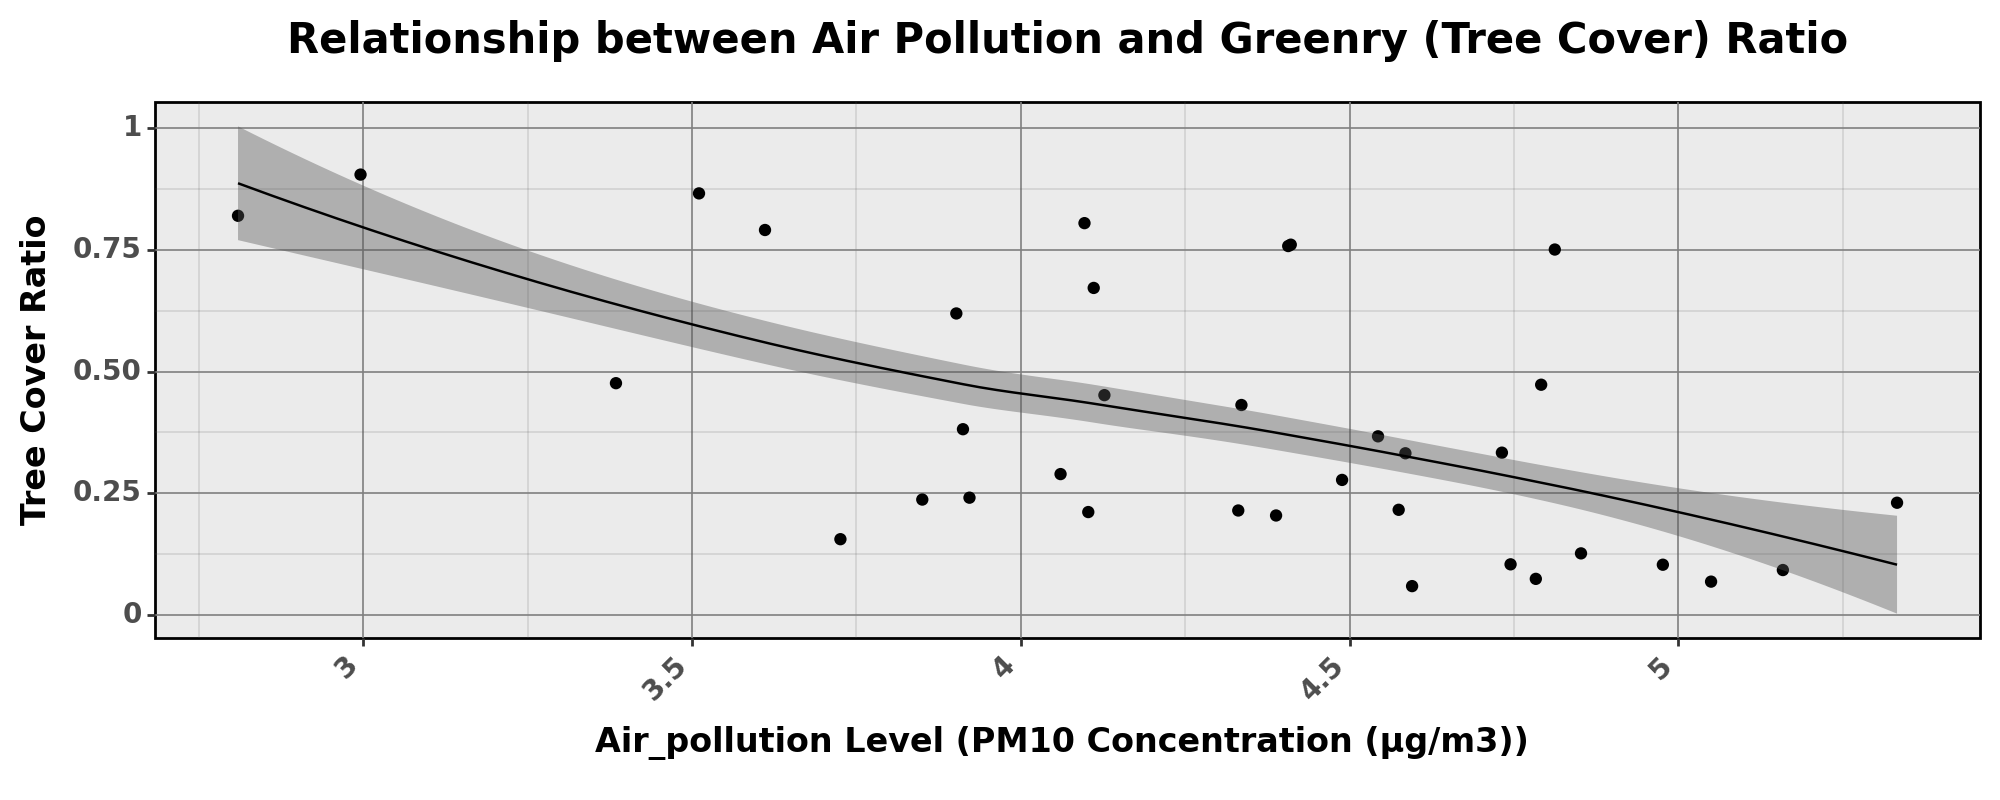

In [61]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='Air_pollution', y='Total_Tree_cover_ratio')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=200, span=1, se=True, linetype="solid", size=0.5, level=0.5, fill='#555555') +
     
    labs(title='Relationship between Air Pollution and Greenry (Tree Cover) Ratio',
         x='Air_pollution Level (PM10 Concentration (µg/m3)) ',
         y='Tree Cover Ratio') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)


### Observations & Support for Hypothesis 3:
The scatter plot provides empirical evidence supporting Hypothesis 3, which suggests an inverse 
relationship between green area percentage and air pollution levels. The observed downtrend in 
the smoothing line implies that states with higher greenery ratios tend to have lower PM10 
concentrations, indicating a potential association between vegetation cover and air quality. This 
finding underscores the importance of green spaces in mitigating air pollution and highlights the 
potential benefits of environmental conservation efforts in reducing public health risks associated 
with poor air quality.

---

In this section, we load the **GSDP dataset** from a CSV file ,perform initial exploration and pre-processing:

In [62]:
df_GDP = pd.read_csv('State_GDP.csv', encoding='latin1')
df_GDP_1 = df_GDP[df_GDP.columns[[1,6,-2]]]
df_GDP_1.drop(index=[9], inplace=True)
print(len(df_GDP_1))
df_GDP_1['State/UT'] = df_GDP_1['State/UT'].replace({'Andaman and Nicobar Islands': 'A&I Islands'})
df_GDP_1['State/UT'] = df_GDP_1['State/UT'].replace({'Jammu and Kashmir UT': 'J&K (+ Ladakh)'})
df_GDP_1.loc[len(df_GDP_1)+1] = ['DNHDD',None,None]

df_GDP_1.loc[len(df_GDP_1)+1] = ['Lakshadweep',None,None]  
df_GDP_1 = df_GDP_1.sort_values(by='State/UT')
df_GDP_1 = df_GDP_1.reset_index()

df_GDP_1 = df_GDP_1.drop(df_GDP_1.columns[[0]],axis=1)
df_GDP_1.rename(columns={df_GDP_1.columns[1]: 'GSDP'}, inplace=True)
df_GDP_1.rename(columns={df_GDP_1.columns[2]: 'GSDP Growth'}, inplace=True)

df_GDP_1.head(2)

33


,State/UT,GSDP,GSDP Growth
0,A&I Islands,NaN,NaN
1,Andhra Pradesh,1133837.0,11.2


## **Visualization 9**: Bar Plot of Gross State Domestic Product (GSDP) by State/UT

This bar plot illustrates the Gross State Domestic Product (GSDP) for each state and union territory (UT) in India. The color of each bar is determined by the growth rate of the GSDP, with shades of green indicating positive growth, shades of red indicating negative growth, and white representing zero growth.

- Each bar in the plot represents the GSDP of a specific state or UT.
- The height of each bar corresponds to the magnitude of the GSDP.
- The color of each bar reflects the growth rate of the GSDP, with shades of green indicating positive growth, shades of red indicating negative growth, and white representing zero growth.


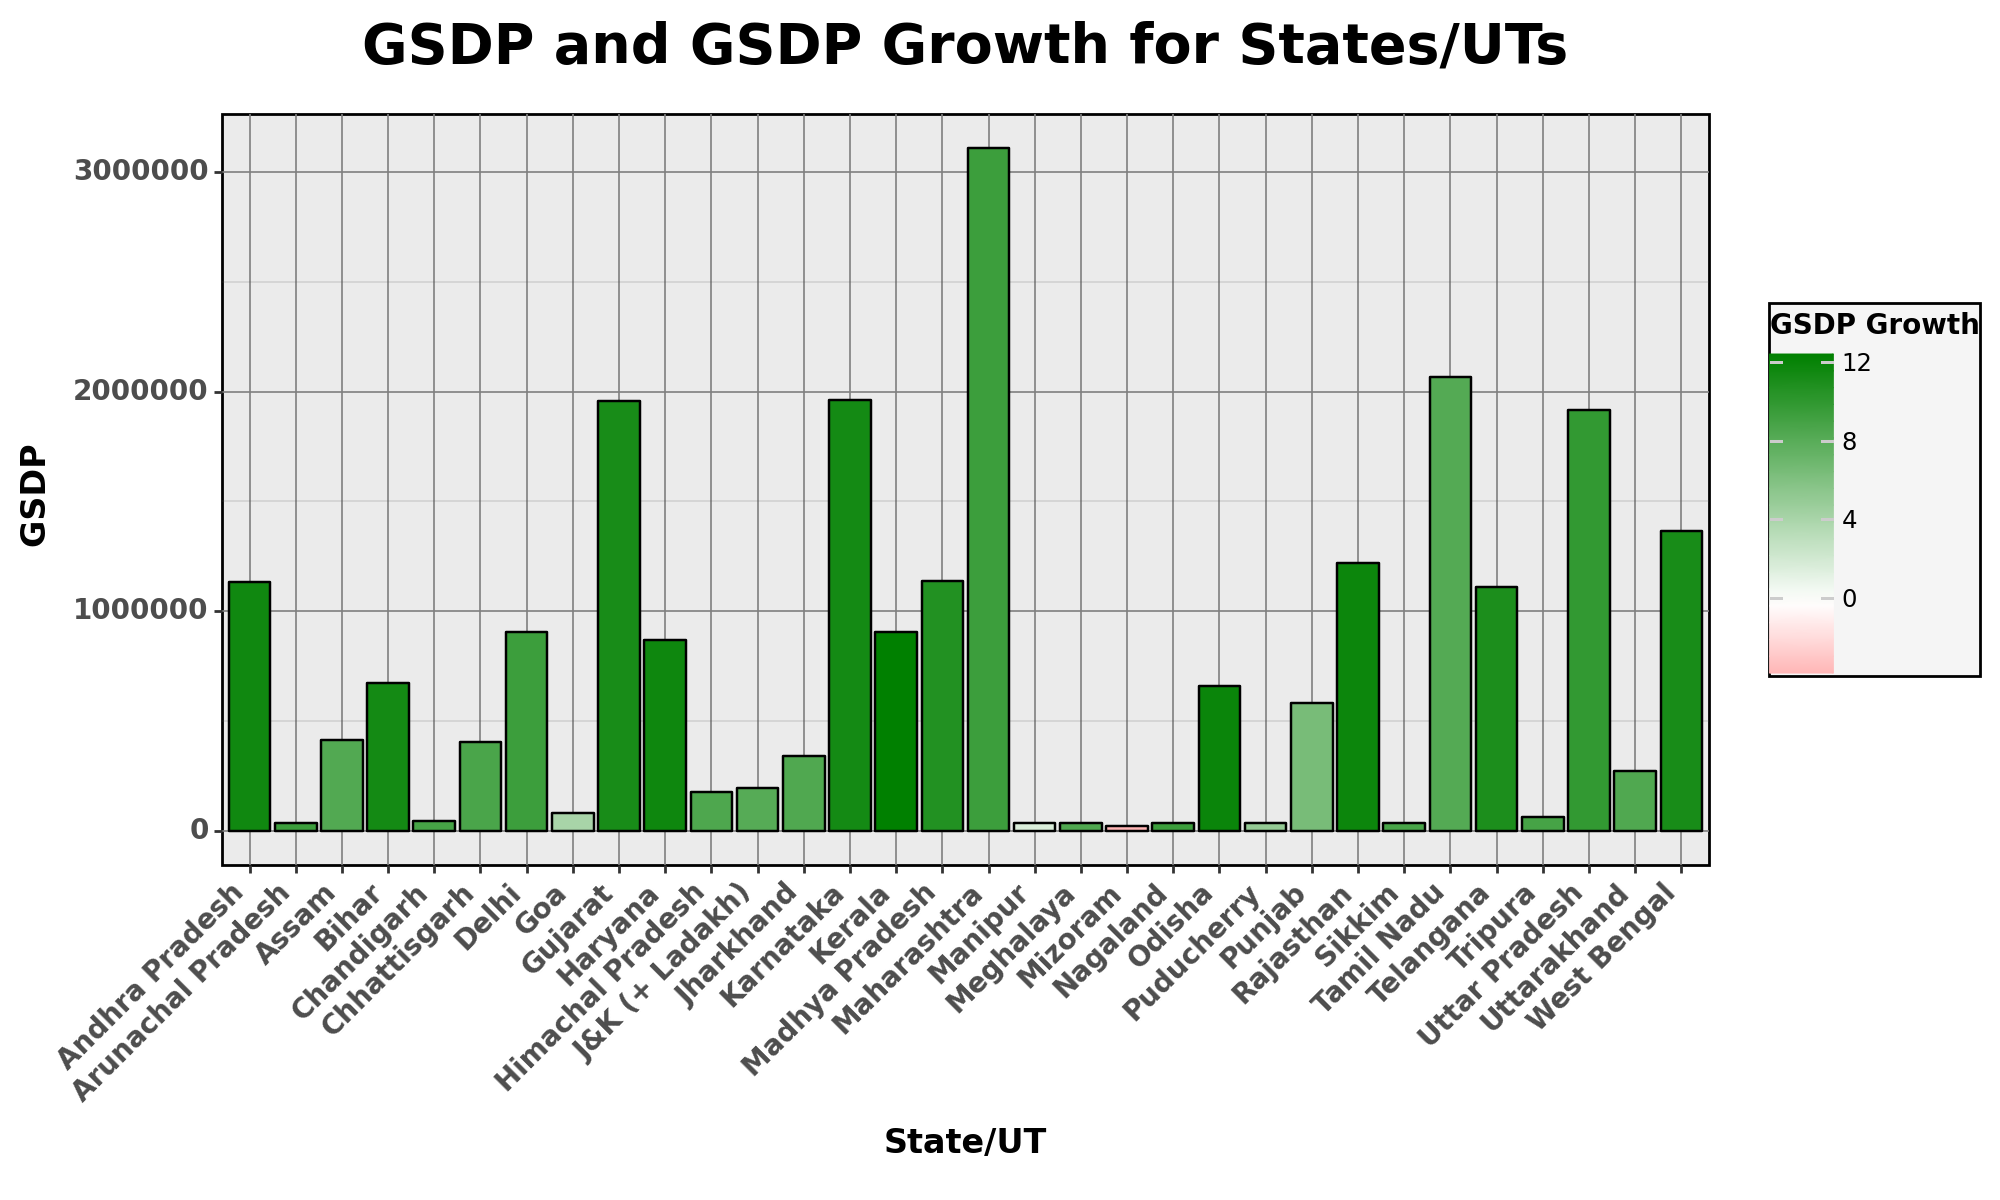

In [63]:

plot = (
    ggplot(df_GDP_1.dropna(), aes(x='State/UT', y='GSDP', fill='GSDP Growth')) +
    labs(title='GSDP and GSDP Growth for States/UTs',
         x='State/UT',
         y='GSDP ') +
    theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(10, 6),
          plot_title=element_text(weight='bold', size=20, hjust=0.5),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black'),
          legend_spacing=20) +
    geom_bar(stat='identity', position='stack', color='black') +
    scale_fill_gradient2(name='GSDP Growth', low="red", mid="white", high="green", midpoint=0, na_value='gray')   # Adjust fill color based on the difference
    )

print(plot)


### Primary Observations:
- Maharashtra emerges to have the highest GSDP.
- Kerala emerges to have the highest GDSP growth rate.
- Unfortunately Mizoram has the lowest GSDP growth rate (negative)

In [73]:
df_green['log_scaled_GSDP'] = np.log(df_GDP_1['GSDP'])
df_green['GSDP'] = df_GDP_1['GSDP']
df_green['GSDP Growth'] = df_GDP_1['GSDP Growth'] 

# **Hypothesis 4**
----
High forest coverage in states correlates with lower Gross State Domestic Product (GSDP), highlighting an inverse relationship between green area percentage and economic development, underscoring the imperative for sustainable development practices.


##	**Visualization 10** : Scatter Plot of Log-Scaled Gross State Domestic Product (GSDP) vs. Greenery Ratio

This scatter plot examines the relationship between the log-scaled Gross State Domestic Product (GSDP), a measure of economic development, and the greenery ratio (percentage of green area, including forest cover and non-forest tree cover) across different states and union territories in India.

- Each state or union territory is represented as a data point on the scatter plot.
- The log-scaled GSDP is depicted on the x-axis, allowing for a wider range of economic values to be displayed.
- The greenery ratio, representing the proportion of green area relative to the total geographical area for each region, is shown on the y-axis.
- A smoothing line with the loess method is included to visualize the overall trend in the relationship between log-scaled GSDP and greenery ratio.


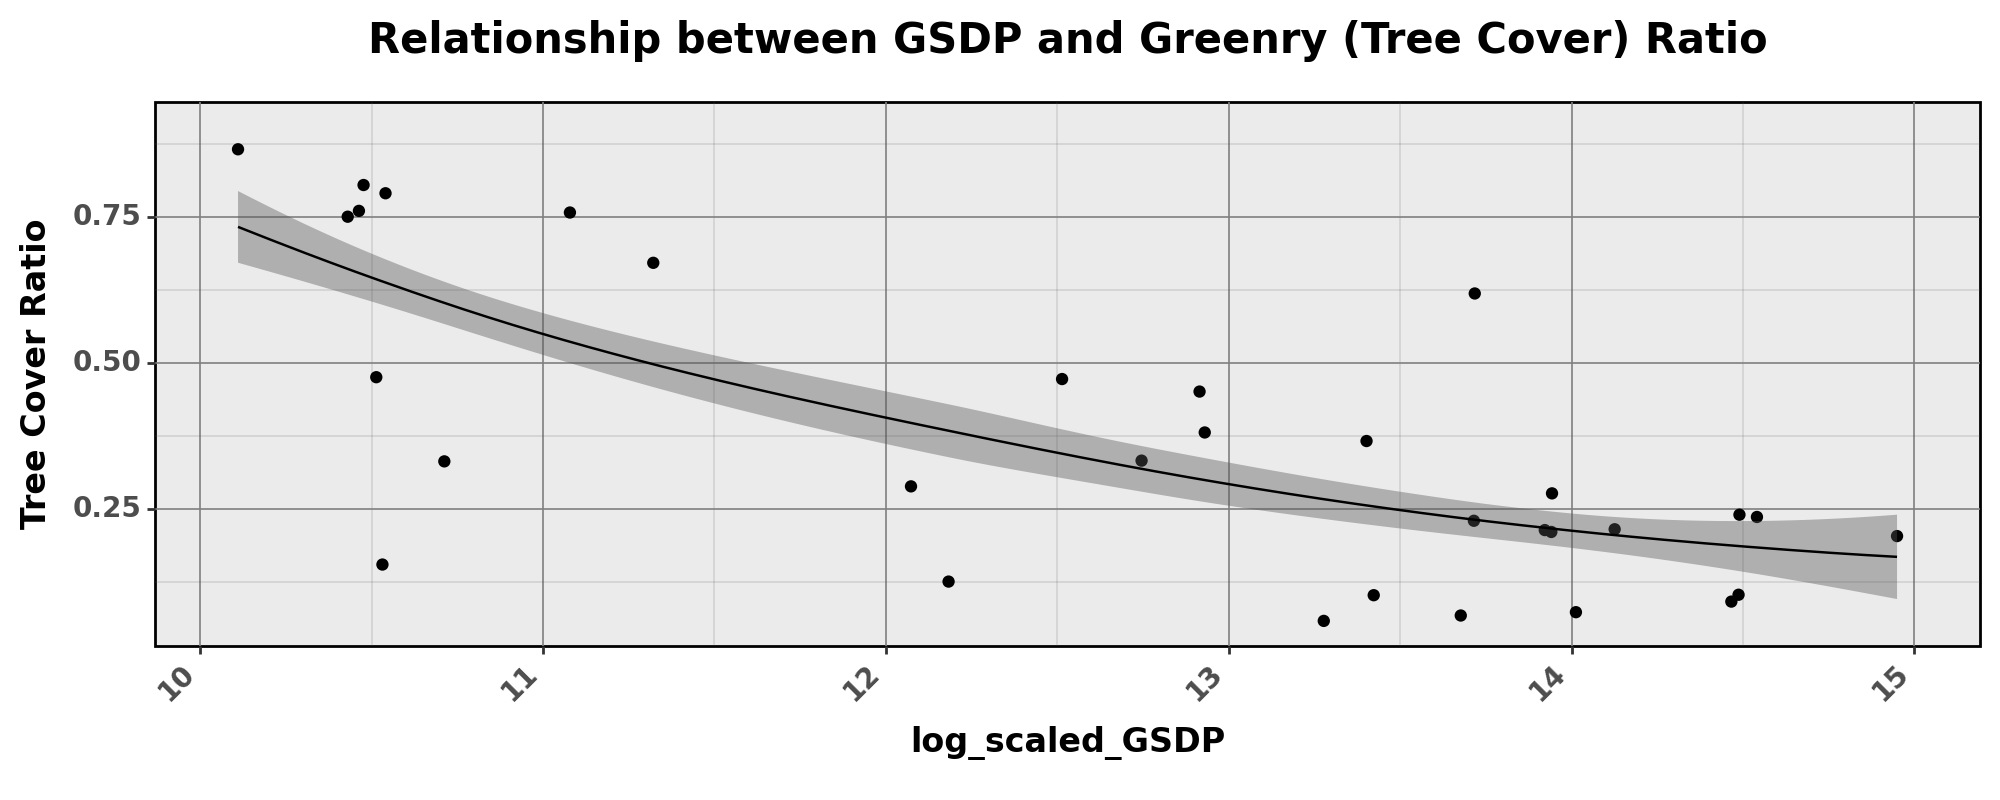

In [74]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='log_scaled_GSDP', y='Total_Tree_cover_ratio')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=200, span=1, se=True, linetype="solid", size=0.5, level=0.5, fill='#555555') +
     
    labs(title='Relationship between GSDP and Greenry (Tree Cover) Ratio',
         x='log_scaled_GSDP',
         y='Tree Cover Ratio') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)

### Observations & Support for Hypothesis 4:
The scatter plot provides empirical evidence supporting Hypothesis 4, which suggests an inverse 
relationship between green area percentage and Gross State Domestic Product (GSDP). The 
observed trend in the smoothing line indicates that states with higher greenery ratios tend to have 
lower log-scaled GSDP values, suggesting that a higher proportion of green area may be associated 
with lower levels of economic development. This finding underscores the importance of 
sustainable development practices that balance economic growth with environmental 
conservation efforts.

---

In [75]:
df_green.head(2)

,State/UTs,Geographical Area,Forest Cover,Non_Forest_Tree_Cover,Forest_Cover_Ratio,Non_Forest_Tree_Cover_Ratio,scaled_geographical_area,Total_Tree_cover_ratio,rainfall,scaled_rainfall,Air_pollution,log_scaled_GSDP,GSDP,GSDP Growth
0,A&N Islands,8249,6744.0,23.0,0.817554,0.002788,0.025001,0.820342,NaN,NaN,2.809403,NaN,NaN,NaN
1,Andhra Pradesh,162968,29784.0,4679.0,0.182760,0.028711,0.495638,0.211471,514.4,0.067609,4.102609,13.941118,1133837.0,11.2


# **Hypothesis 5**
---
States experiencing robust Gross State Domestic Product (GSDP) tend to face heightened Air Pollution (PM10 Concentration), underscoring the inherent correlation between development and environmental degradation. Despite this, these dynamic states are actively pursuing measures to combat air pollution, highlighting the imperative for sustainable development practices.

## **Visualization 11**: Scatter Plot of Scaled Gross State Domestic Product (GSDP) vs. PM10 Concentration

This scatter plot examines the relationship between scaled Gross State Domestic Product (GSDP), a measure of economic development, and PM10 concentration, an indicator of air pollution, across different states and union territories in India.

- Each state or union territory is represented as a data point on the scatter plot.
- The scaled GSDP is depicted on the x-axis, allowing for a standardized representation of economic values.
- PM10 concentration, a measure of air pollution, is shown on the y-axis.
- A smoothing line with the loess method is included to visualize the overall trend in the relationship between scaled GSDP and PM10 concentration.


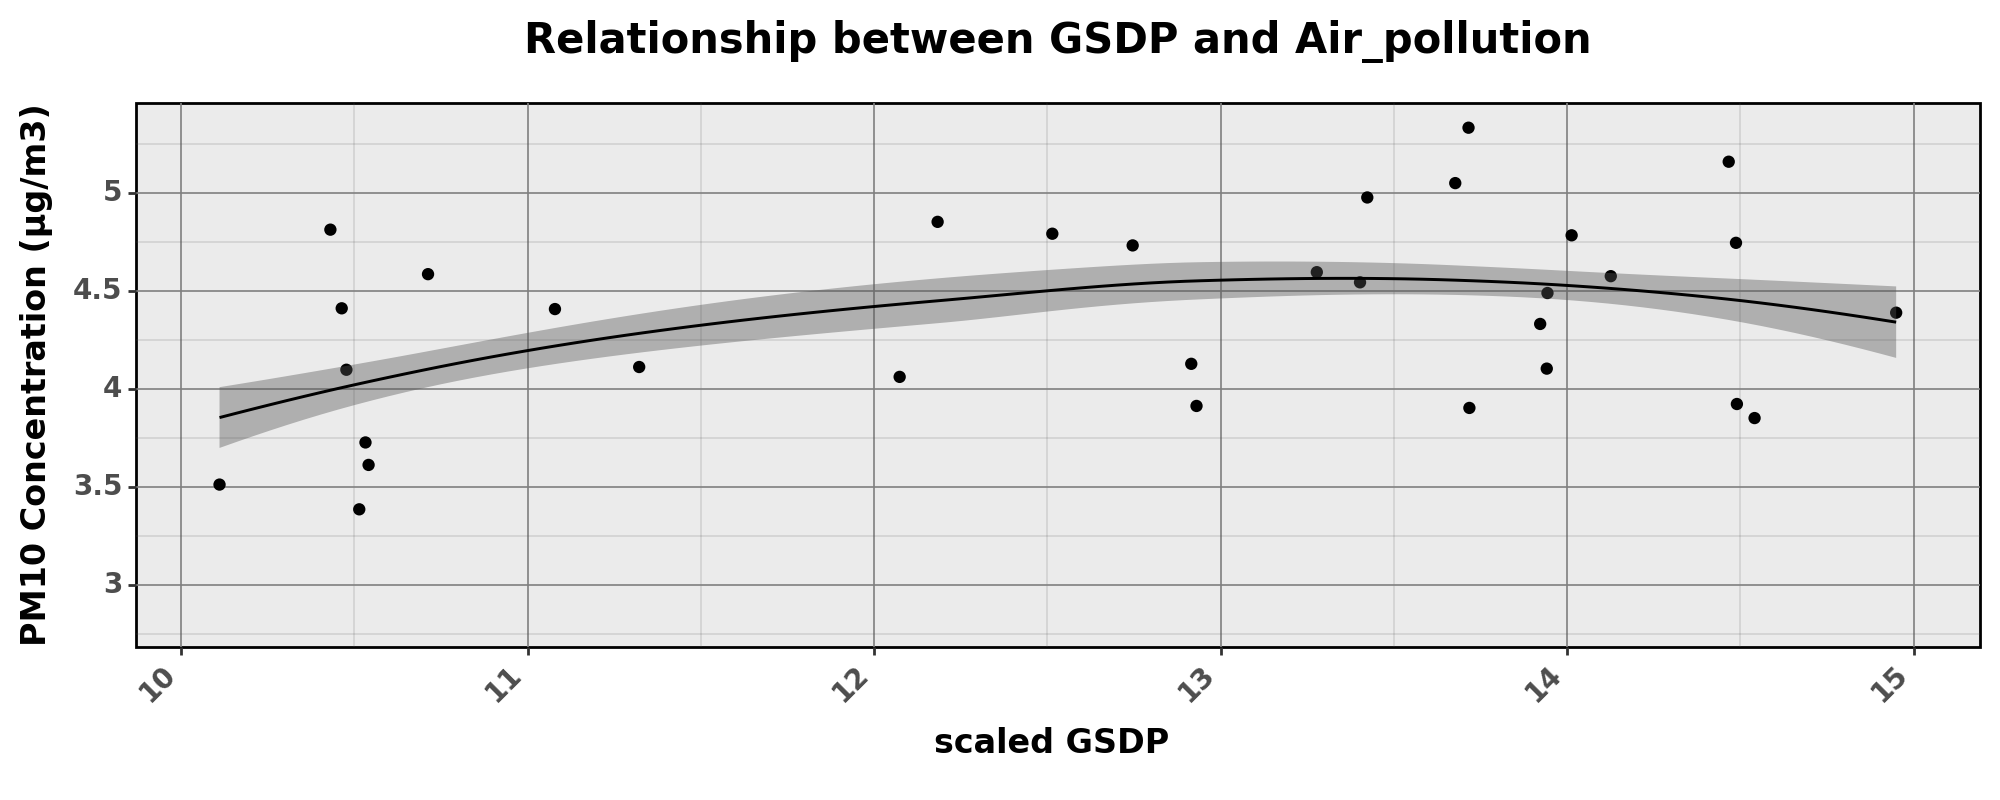

In [76]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='log_scaled_GSDP', y='Air_pollution')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=100, span=1, se=True, linetype="solid", size=0.6, level=0.5, fill='#555555') +
     
    labs(title='Relationship between GSDP and Air_pollution',
         x='scaled GSDP ',
         y='PM10 Concentration (µg/m3)') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)

### Observations & Support for Hypothesis 5:
The scatter plot provides empirical evidence supporting Hypothesis 5, which suggests a correlation 
between robust economic development (as indicated by scaled GSDP) and heightened PM10 
concentration (indicative of air pollution). The observed trend in the smoothing line indicates that 
states with higher scaled GSDP values tend to exhibit higher PM10 concentrations, underscoring 
the potential environmental degradation associated with economic growth. Despite this 
correlation, some states may be actively pursuing measures to combat air pollution, as evidenced 
by slight decreases in PM10 concentration towards the higher end of scaled GSDP values. This 
finding highlights the imperative for sustainable development practices that prioritize 
environmental conservation alongside economic growth.

---

# **Hypothesis 5+**
---
States with higher Gross State Domestic Product (GSDP) are endeavoring to offset air pollution by augmenting non-forest tree cover, a premise supported by Hypothesis 4. This strategic approach underscores a concerted effort towards achieving environmental equilibrium amidst developmental strides.

##  **Visualization 12**: Scatter Plot of Gross State Domestic Product (GSDP) vs. Non-Forest Tree Cover

This scatter plot explores the relationship between Gross State Domestic Product (GSDP), an indicator of economic development, and non-forest tree cover across different states and union territories in India.

- Each state or union territory is represented as a data point on the scatter plot.
- GSDP is depicted on the x-axis, showcasing the economic prosperity of each region.
- Non-forest tree cover, which includes trees outside of forest areas, is shown on the y-axis.
- A smoothing line with the loess method is included to visualize the overall trend in the relationship between GSDP and non-forest tree cover.


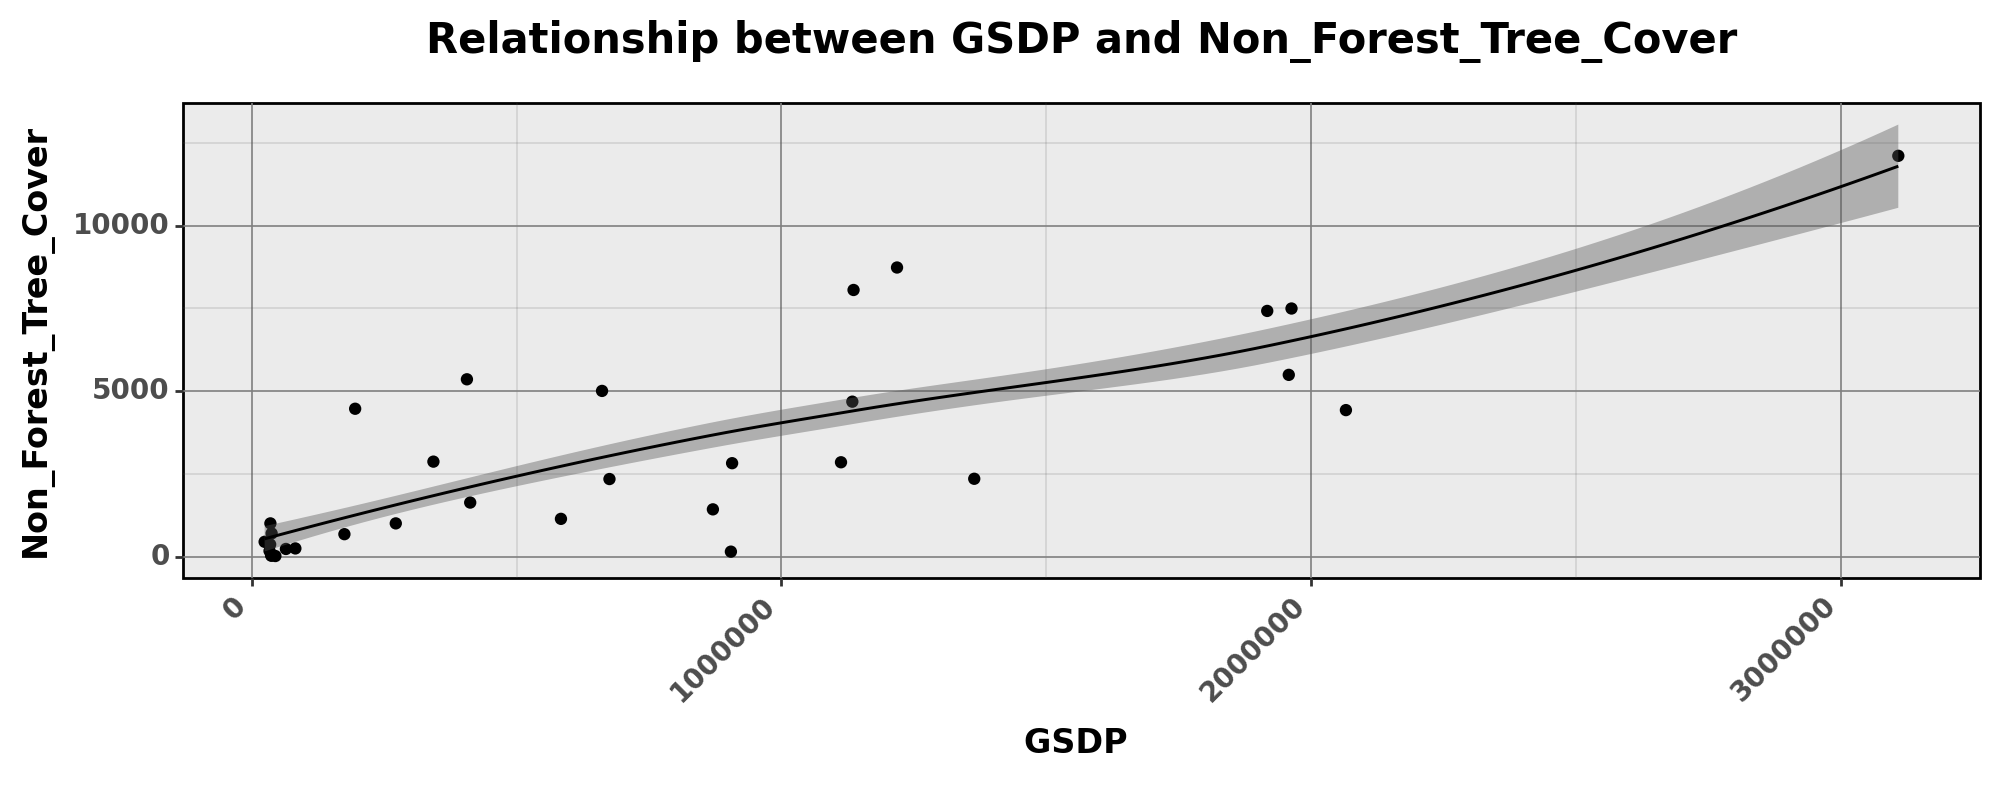

In [77]:
scatter_plot = (
    ggplot(df_green[:-1], aes(x='GSDP', y='Non_Forest_Tree_Cover')) +
    geom_point() +
    stat_smooth(color="Black", method="loess", n=100, span=1, se=True, linetype="solid", size=0.6, level=0.5, fill='#555555') +
     
    labs(title='Relationship between GSDP and Non_Forest_Tree_Cover',
         x='GSDP ',
         y='Non_Forest_Tree_Cover') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=12, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(scatter_plot)

### Observations & Support for Hypothesis 5+:
The scatter plot provides empirical evidence supporting Hypothesis 5+, which suggests that states 
with higher GSDP values are endeavouring to offset air pollution by augmenting non-forest tree 
cover. The observed trend in the smoothing line indicates that as GSDP increases, there is a 
corresponding increase in non-forest tree cover, indicating a strategic approach towards achieving 
environmental equilibrium amidst developmental strides. This finding aligns with Hypothesis 5, 
which highlights the states are actively pursuing measures to combat air pollution, highlighting the 
imperative for sustainable development practices. Overall, the plot underscores a concerted effort 
by economically developed states to mitigate air pollution through measures such as increasing 
non-forest tree cover, thereby contributing to environmental sustainability alongside economic 
growth.

---

## **Visualization 13** : Heatmap of Correlation Between Environmental and Developmental Aspects

This heatmap illustrates the correlation between various environmental and developmental aspects across different states and union territories in India.
- The heatmap displays a grid of squares, with each square representing the correlation coefficient between two variables.
- The correlation coefficient ranges from -1 to 1


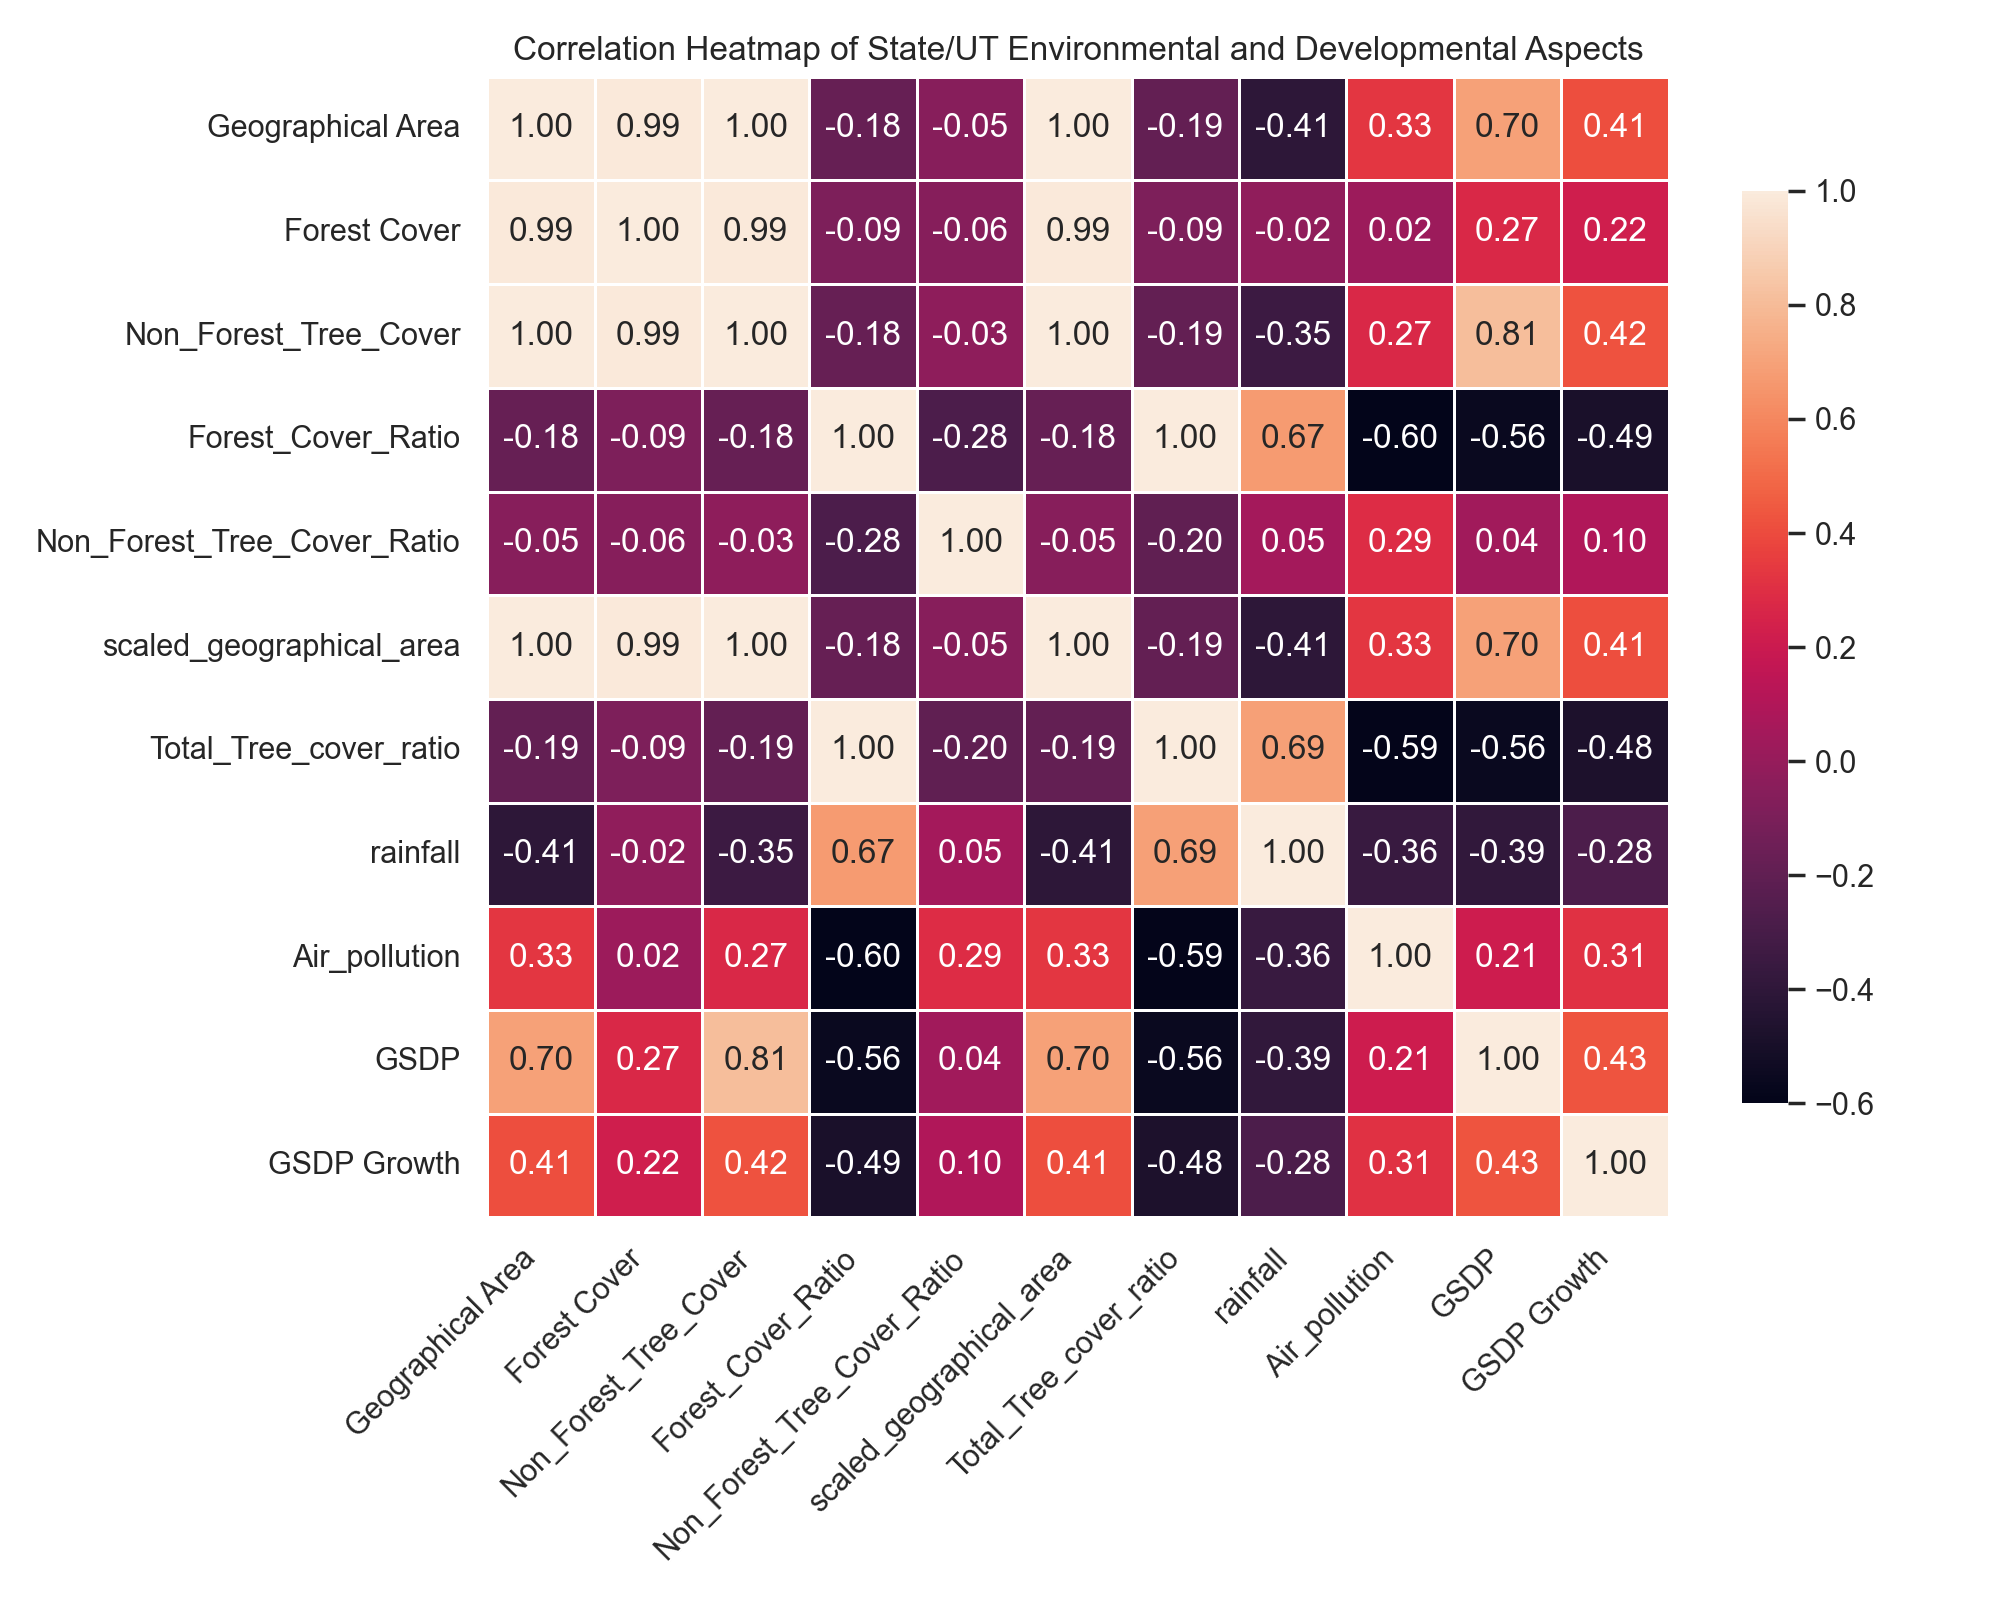

In [79]:
df_green_1 = df_green[df_green.columns[[1,2,3,4,5,6,7,8,10,12,13]]]
sns.set(style='white')
corr_matrix = df_green_1.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})  
plt.title('Correlation Heatmap of State/UT Environmental and Developmental Aspects')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  

plt.tight_layout()  
plt.show()


# INDIA as a whole

In this section, we load the non India forest cover, India Air pollution datasets containing from a CSV file ,perform initial exploration and pre-processing:

In [80]:
df_india_forest_cover = pd.read_csv('India_tree_cover.csv')
df_india_forest_cover


,India State of Forest Report,Total Forest Cover,Increase in Forest Cover w.r.t. previous Assessment
0,2017,708273,6778
1,2019,712249,3976
2,2021,713789,1540


In [81]:
df_india_AP = pd.read_csv('India AIR_pollution.csv', encoding='latin1')
df_india_AP.head(2)

,Year,PM10 (µg/m3),PM2.5 (µg/m3)
0,2016,291,135
1,2017,266,124


In [92]:
df_india_AP_1 = df_india_AP.loc[[1,3,5]]
df_india_AP_1 = df_india_AP_1.reset_index()
df_GDP_1 = df_GDP_1.drop(df_GDP_1.columns[[0]],axis=1)
df_india = df_india_forest_cover.copy()
df_india['AP'] = df_india_AP_1['PM10 (µg/m3)']
df_india.rename(columns={'India State of Forest Report': 'Year'}, inplace=True)

df_india

,Year,Total Forest Cover,Increase in Forest Cover w.r.t. previous Assessment,AP
0,2017,708273,6778,266
1,2019,712249,3976,218
2,2021,713789,1540,212


# **Hypothesis 3+**
---
Reinstateing Hypothesis 3 over the years we can se Air Pollution decreasing with increase in Forest Cover , suggesting an inverse relationship between green percentage and air pollution levels.

## **Visualization 14** : Line Plot of Total Forest Cover vs. PM10 Concentration Over Time

This line plot depicts the relationship between total forest cover in India and PM10 concentration levels across three years: 2017, 2019, and 2021.

- The x-axis represents the total forest cover in India.
- The y-axis represents PM10 concentration levels.
- The line plot shows the trend in PM10 concentration levels over the three-year period.
- Each point on the line represents the PM10 concentration level for the corresponding year.


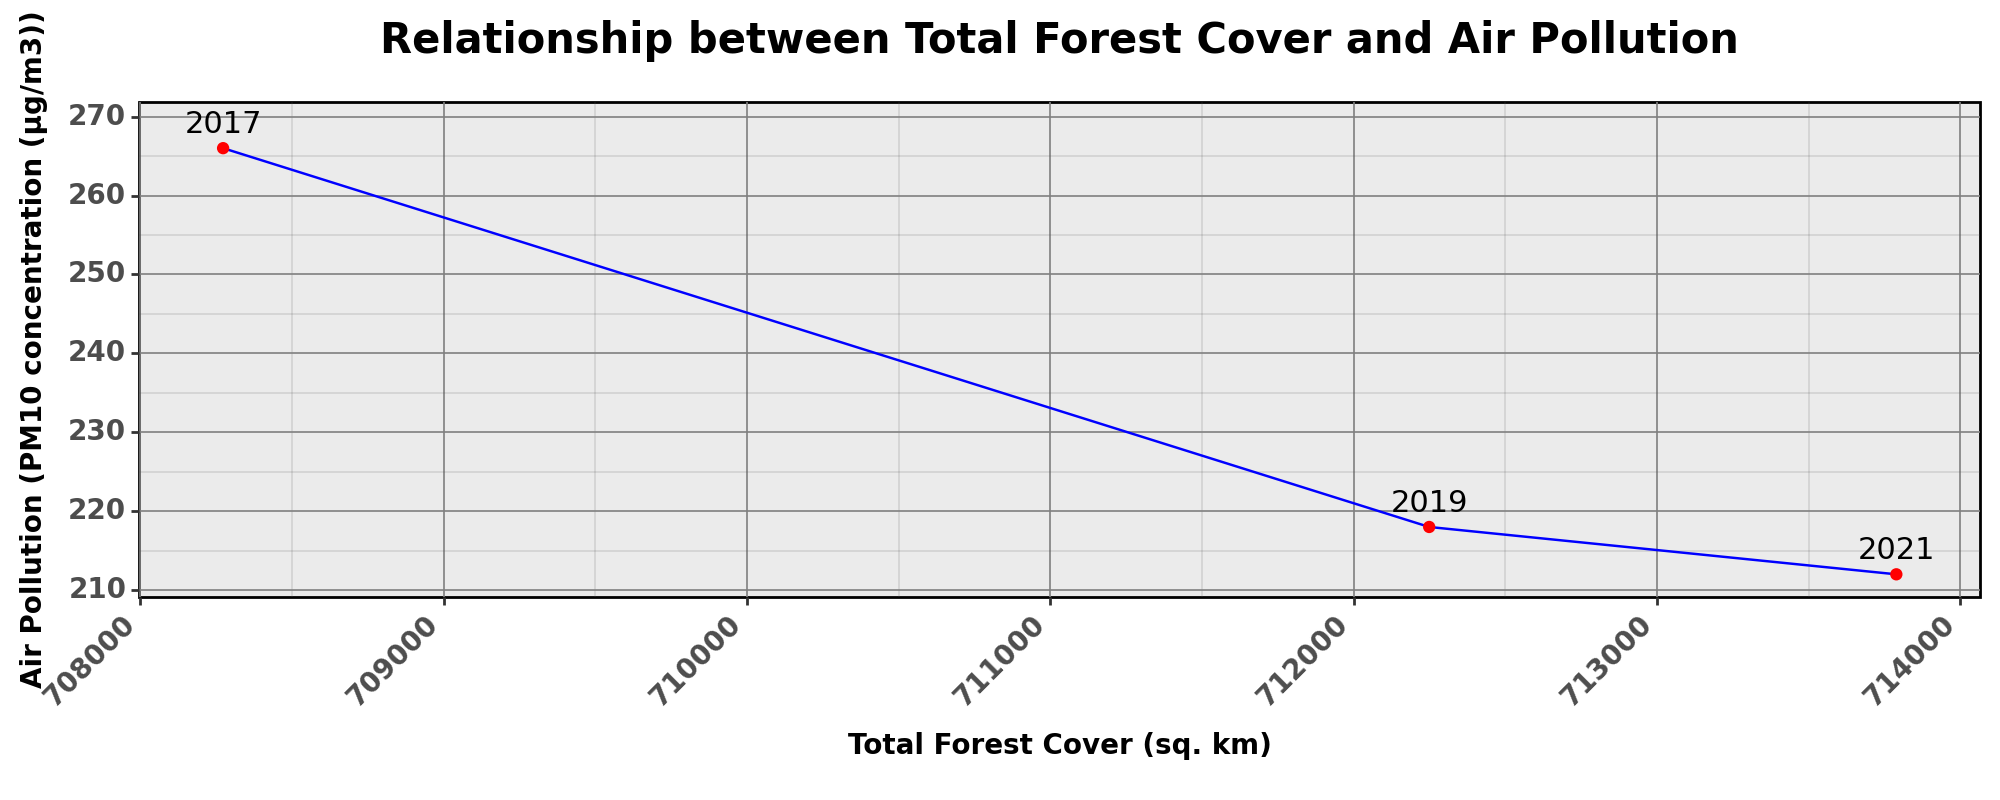

In [86]:

line_plot = (
    ggplot(df_india, aes(x='Total Forest Cover', y='AP')) +
    geom_line(color="blue") + 
    geom_point(color="red") + 
    geom_text(aes(label='Year'), data=df_india[df_india['Year'].isin([2017, 2019, 2021])], nudge_y=3, color='black') + 
    labs(title='Relationship between Total Forest Cover and Air Pollution',
         x='Total Forest Cover (sq. km)',
         y='Air Pollution (PM10 concentration (µg/m3))') +
    theme(axis_text_x=element_text(angle=45, hjust=1), 
          figure_size=(10, 4),
          plot_title=element_text(weight='bold', size=15, hjust=0.5), 
          axis_text=element_text(size=10, weight='bold'),
          axis_title=element_text(size=10, weight='bold'),
          panel_grid_major=element_line(color="gray", size=0.6),
          panel_grid_minor=element_line(color="#555555", size=0.1),
          panel_border=element_rect(color="black", fill="transparent", size=1),
          legend_background=element_rect(color="black", fill="#F5F5F5", size=1),
          legend_title=element_text(size=10, face='bold'),
          legend_key=element_rect(fill='white', color='black', size=2),  
          legend_spacing=20,
          legend_position='top') 
)

print(line_plot)


### Observations & Support for Hypothesis 3+:
The downward trend in PM10 concentrations observed over the years provides empirical support 
for Hypothesis 3+, suggesting that air pollution decreases with an increase in forest cover. The 
simultaneous increase in total forest cover and decrease in PM10 concentrations indicate a 
potential inverse relationship between greenery and air pollution levels, reinforcing the hypothesis
3. This trend underscores the role of forests and green spaces in mitigating air pollution, 
highlighting the importance of environmental conservation efforts in promoting cleaner air and 
healthier environments.

---
---